In [1]:
#AI And DA project
#Abishek THAMIZHARSAN-62733
#Megha SIVASANKAR-62775

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import shutil
import csv
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.models import resnet18
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
# Load labels
labels_df = pd.read_csv(r"training_labels.csv")

In [3]:
# Load images
image_dir = "training"
image_files = os.listdir(image_dir)
images = [Image.open(os.path.join(image_dir, image_file)) for image_file in image_files]

**To view the segmentation images**

This code helps us to view the segmentation images which can be used to Visually compute the number of spots on each training image, and complete the «spot_number » column of the « training_labels.csv » file.

In [2]:
import os
import numpy as np
from PIL import Image

# Directory containing your images
image_dir = "training/"

# List all the files in the directory
files = os.listdir(image_dir)

# Separate out the RGB and segmentation images
rgb_files = [f for f in files if "_im.png" in f]
seg_files = [f for f in files if "_seg.png" in f]

# Make sure we have pairs for all images
assert len(rgb_files) == len(seg_files)

# Load the segmentation image
for seg_file in seg_files:
    seg_img = Image.open(os.path.join(image_dir, seg_file))

    # Convert the image into a numpy array
    seg_array = np.array(seg_img)

    # Get unique values in the array, each representing a separate region
    unique_values = np.unique(seg_array)

    # Print out the unique values
    print(f"Unique values in {seg_file}: {unique_values}")
import os
import numpy as np
from PIL import Image

# Directory containing your images
image_dir = "training/"

# List all the files in the directory
files = os.listdir(image_dir)

# Separate out the RGB and segmentation images
rgb_files = [f for f in files if "_im.png" in f]
seg_files = [f for f in files if "_seg.png" in f]

# Make sure we have pairs for all images
assert len(rgb_files) == len(seg_files)

# Load the segmentation image
for seg_file in seg_files:
    seg_img = Image.open(os.path.join(image_dir, seg_file))

    # Convert the image into a numpy array
    seg_array = np.array(seg_img)

    # Get unique values in the array, each representing a separate region
    unique_values = np.unique(seg_array)

    # Print out the unique values
    print(f"Unique values in {seg_file}: {unique_values}")


Unique values in im-033_seg.png: [  0  21  42  63  85 106 127 148 170 191 212 233 255]
Unique values in im-023_seg.png: [  0  11  22  33  44  55  66  77  88  99 110 121 133 144 155 166 177 188
 199 210 221 232 243 255]
Unique values in im-129_seg.png: [  0  21  42  63  85 106 127 148 170 191 212 233 255]
Unique values in im-051_seg.png: [  0  23  46  69  92 115 139 162 185 208 231 255]
Unique values in im-139_seg.png: [  0  12  24  36  48  60  72  85  97 109 121 133 145 157 170 182 194 206
 218 230 242 255]
Unique values in im-041_seg.png: [  0  21  42  63  85 106 127 148 170 191 212 233 255]
Unique values in im-190_seg.png: [  0  12  24  36  48  60  72  85  97 109 121 133 145 157 170 182 194 206
 218 230 242 255]
Unique values in im-180_seg.png: [  0   9  18  28  37  47  56  66  75  85  94 103 113 122 132 141 151 160
 170 179 188 198 207 217 226 236 245 255]
Unique values in im-174_seg.png: [  0   9  18  28  37  47  56  66  75  85  94 103 113 122 132 141 151 160
 170 179 188 198 207 2

Unique values in im-146_seg.png: [  0  31  63  95 127 159 191 223 255]
Unique values in im-097_seg.png: [  0  36  72 109 145 182 218 255]
Unique values in im-087_seg.png: [  0  11  23  34  46  57  69  81  92 104 115 127 139 150 162 173 185 197
 208 220 231 243 255]
Unique values in im-062_seg.png: [  0  12  24  36  48  60  72  85  97 109 121 133 145 157 170 182 194 206
 218 230 242 255]
Unique values in im-072_seg.png: [  0  23  46  69  92 115 139 162 185 208 231 255]
Unique values in im-178_seg.png: [  0  23  46  69  92 115 139 162 185 208 231 255]
Unique values in im-168_seg.png: [  0  15  31  47  63  79  95 111 127 143 159 175 191 207 223 239 255]
Unique values in im-010_seg.png: [  0  11  22  33  44  55  66  77  88  99 110 121 133 144 155 166 177 188
 199 210 221 232 243 255]
Unique values in im-125_seg.png: [  0  25  51  76 102 127 153 178 204 229 255]
Unique values in im-135_seg.png: [  0  23  46  69  92 115 139 162 185 208 231 255]
Unique values in im-086_seg.png: [  0  11  23  

Unique values in im-112_seg.png: [  0  18  36  54  72  91 109 127 145 163 182 200 218 236 255]
Unique values in im-102_seg.png: [  0  25  51  76 102 127 153 178 204 229 255]
Unique values in im-037_seg.png: [  0  19  39  58  78  98 117 137 156 176 196 215 235 255]
Unique values in im-027_seg.png: [  0  17  34  51  68  85 102 119 136 153 170 187 204 221 238 255]
Unique values in im-194_seg.png: [  0  19  39  58  78  98 117 137 156 176 196 215 235 255]
Unique values in im-184_seg.png: [  0  31  63  95 127 159 191 223 255]
Unique values in im-055_seg.png: [  0  11  23  34  46  57  69  81  92 104 115 127 139 150 162 173 185 197
 208 220 231 243 255]
Unique values in im-045_seg.png: [  0  10  20  30  40  51  61  71  81  91 102 112 122 132 142 153 163 173
 183 193 204 214 224 234 244 255]
Unique values in im-073_seg.png: [  0  12  24  36  48  60  72  85  97 109 121 133 145 157 170 182 194 206
 218 230 242 255]
Unique values in im-063_seg.png: [  0  21  42  63  85 106 127 148 170 191 212 233 

In [4]:
# List all the files in the directory
files = os.listdir(image_dir)

# Separate out the RGB and segmentation images
rgb_files = [f for f in files if "_im.png" in f]
seg_files = [f for f in files if "_seg.png" in f]

# Make sure we have pairs for all images
assert len(rgb_files) == len(seg_files)

# Scale and save the segmentation images
for seg_file in seg_files:
    seg_img = Image.open(os.path.join(image_dir, seg_file))

    # Convert the image into a numpy array
    seg_array = np.array(seg_img)

    # Scale the pixel values to full range (0-255)
    seg_array_scaled = ((seg_array - seg_array.min()) * (255.0 / (seg_array.max() - seg_array.min()))).astype(np.uint8)

    # Convert the scaled array back into an Image object
    seg_img_scaled = Image.fromarray(seg_array_scaled)

    # Save the image, replacing the old one
    seg_img_scaled.save(os.path.join(image_dir, seg_file))

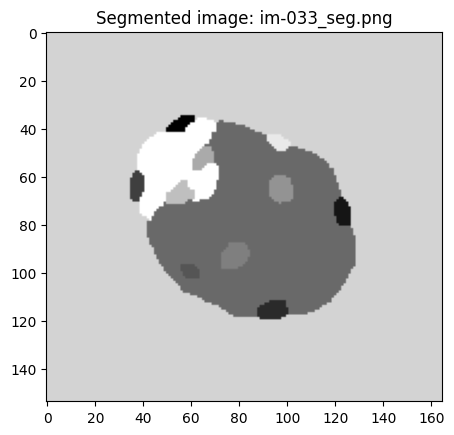

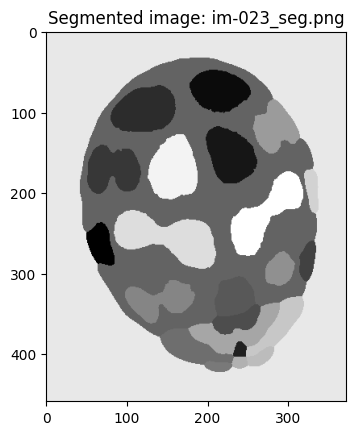

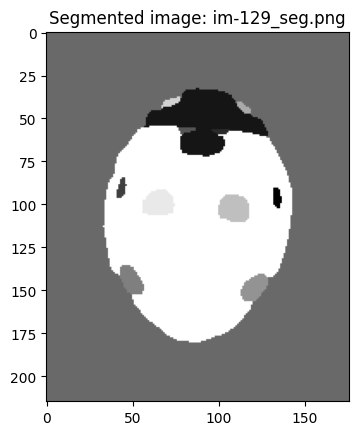

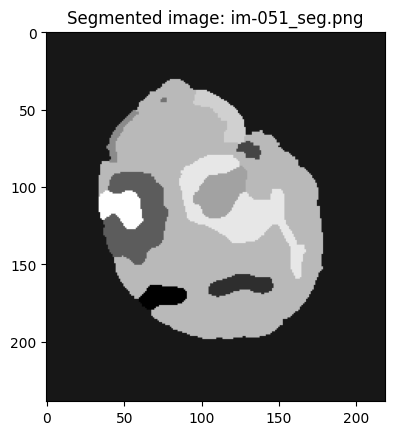

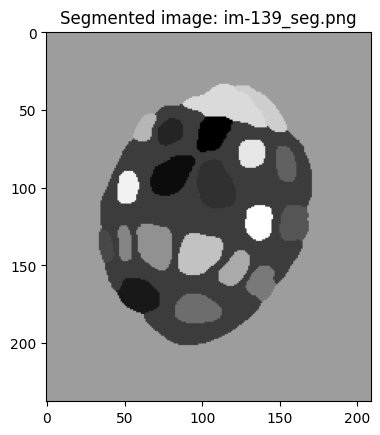

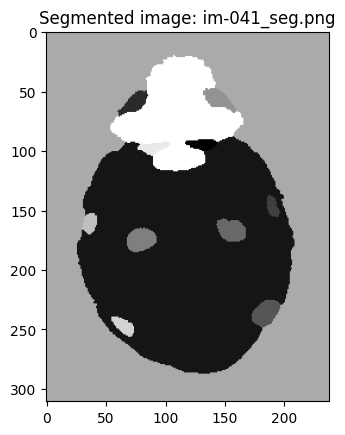

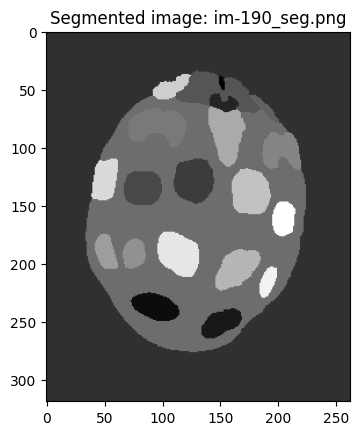

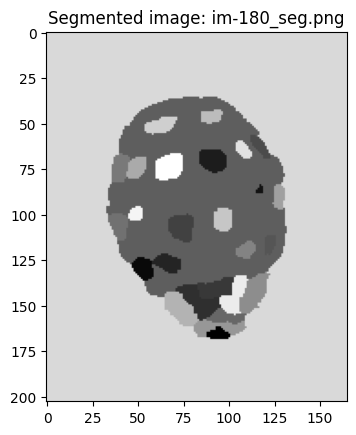

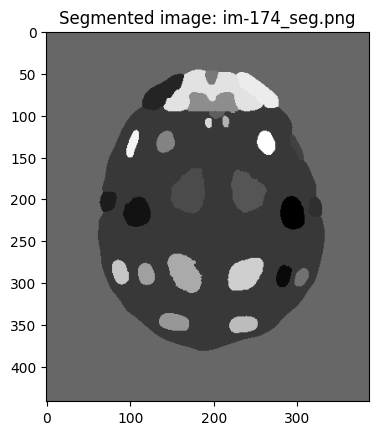

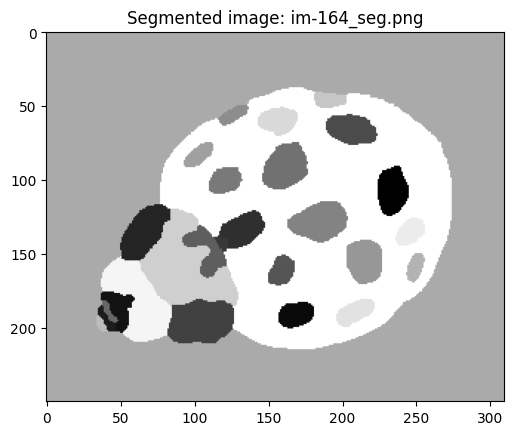

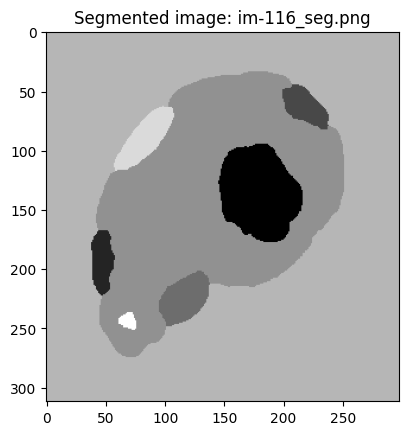

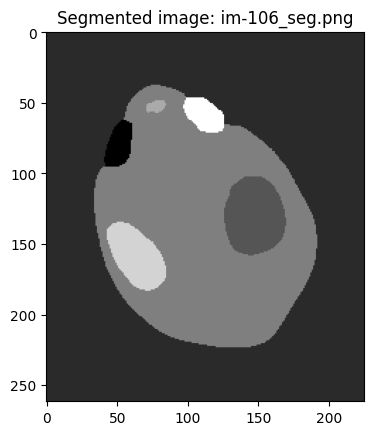

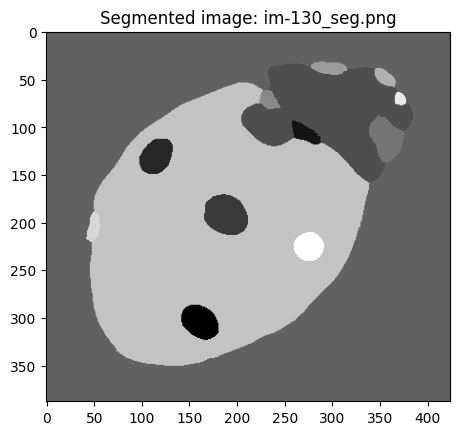

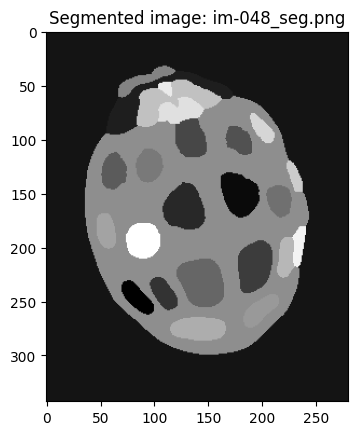

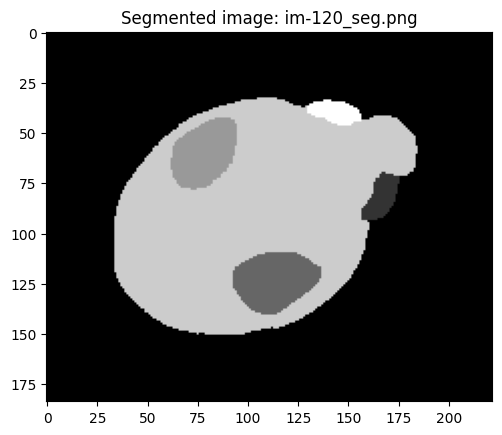

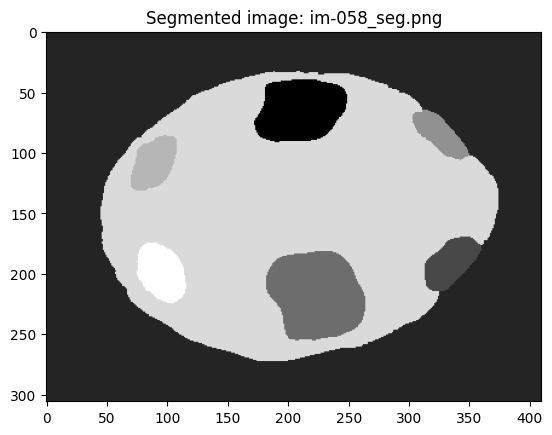

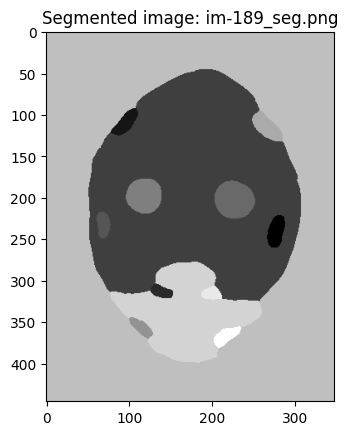

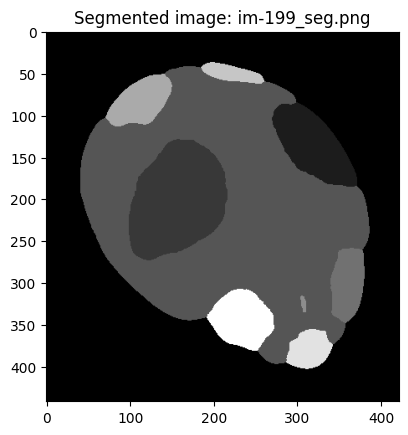

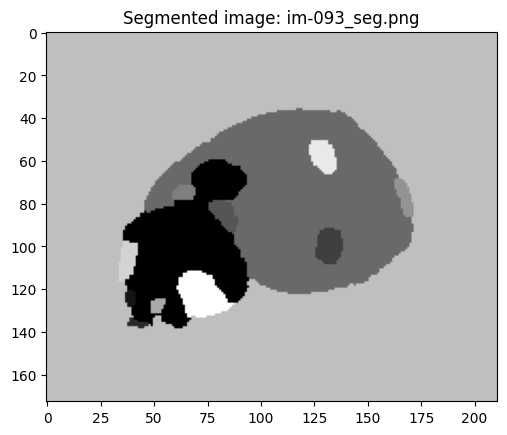

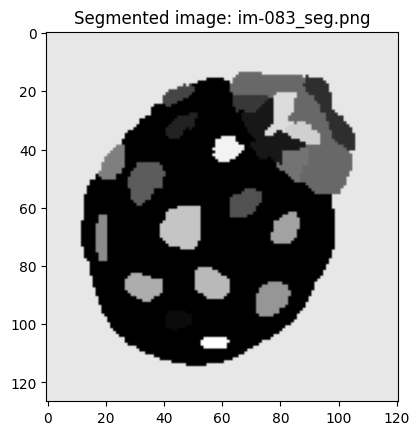

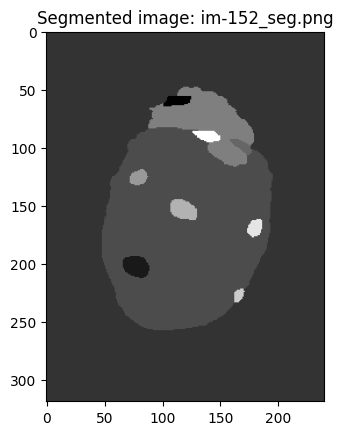

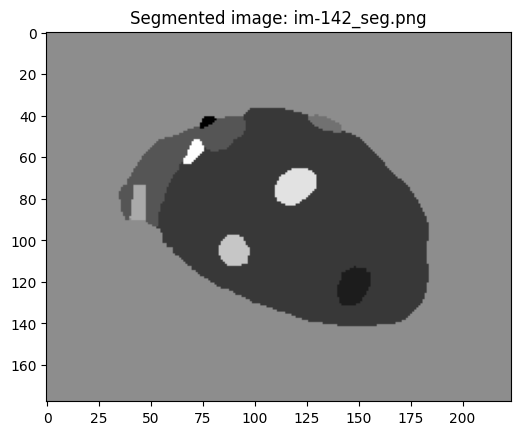

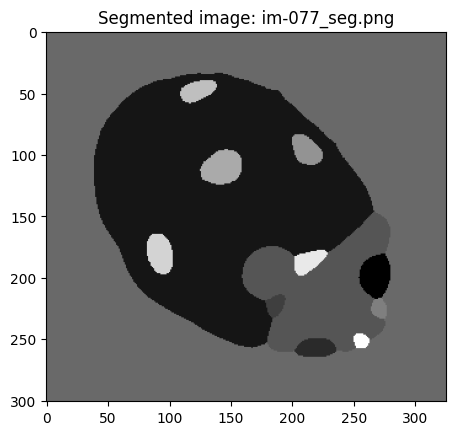

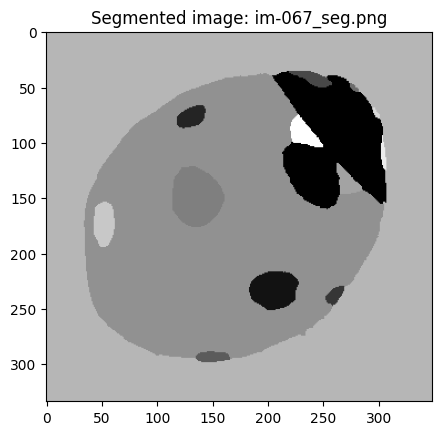

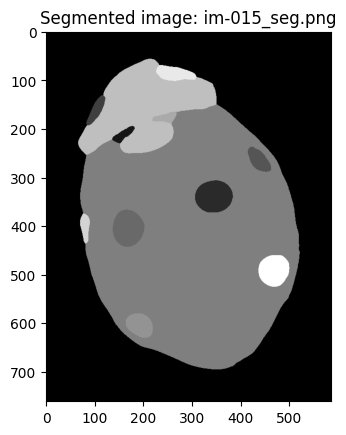

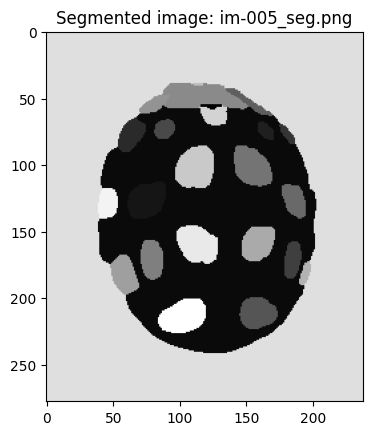

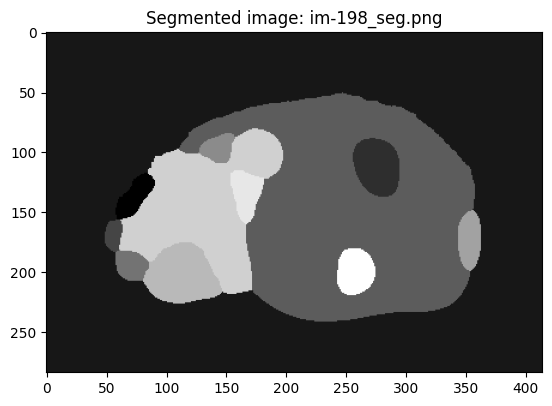

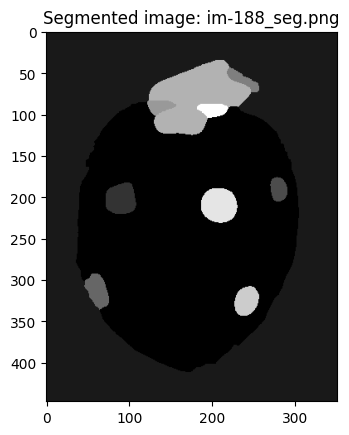

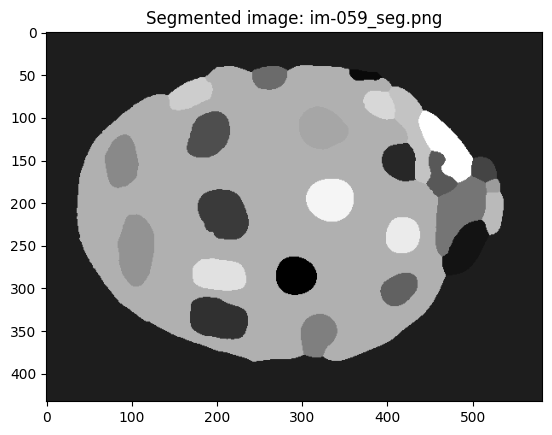

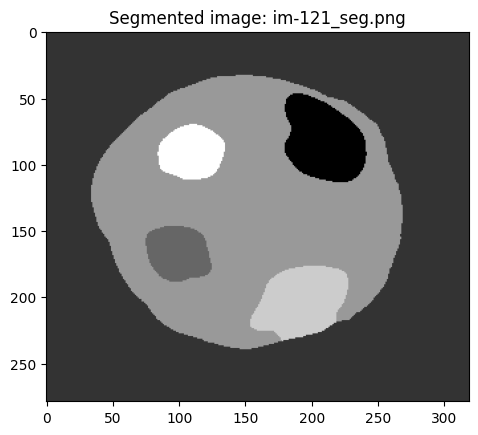

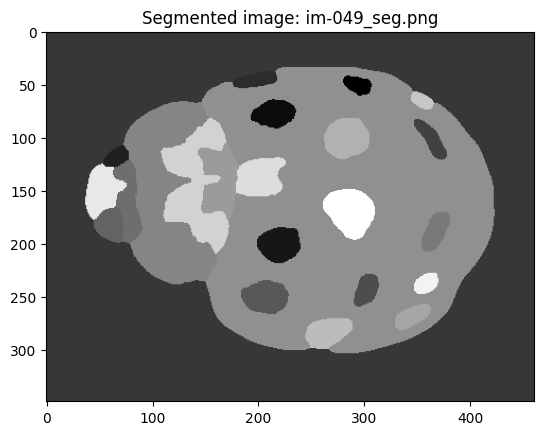

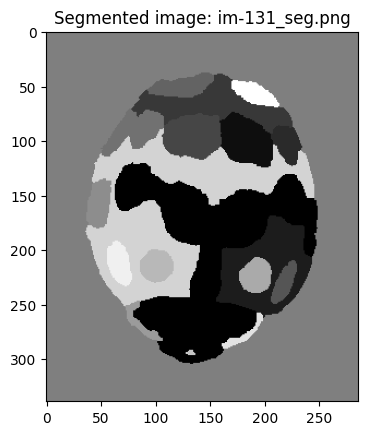

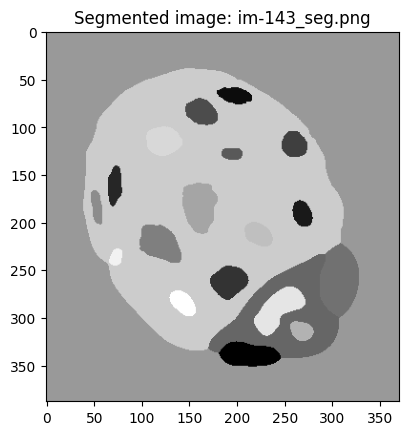

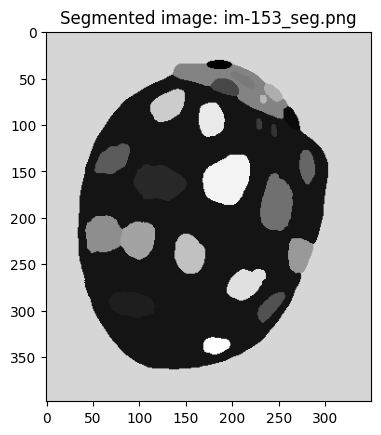

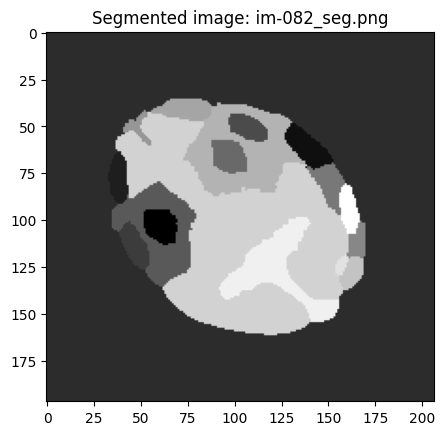

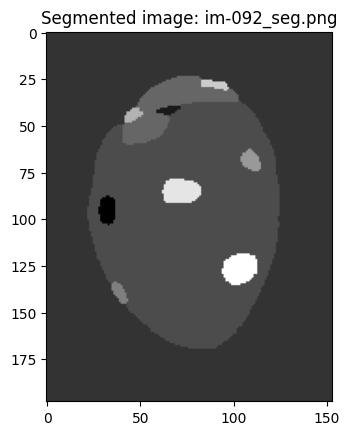

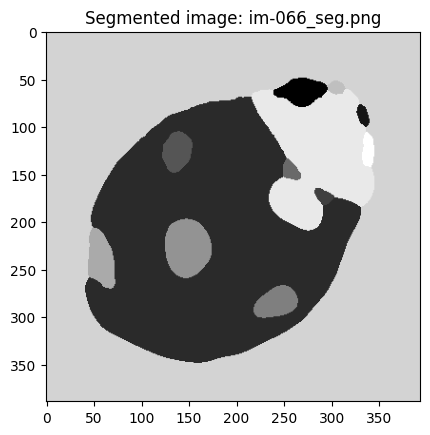

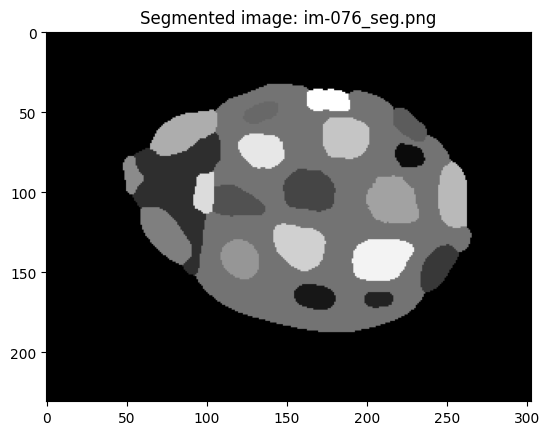

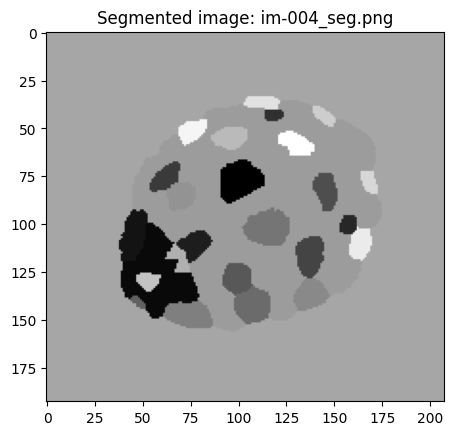

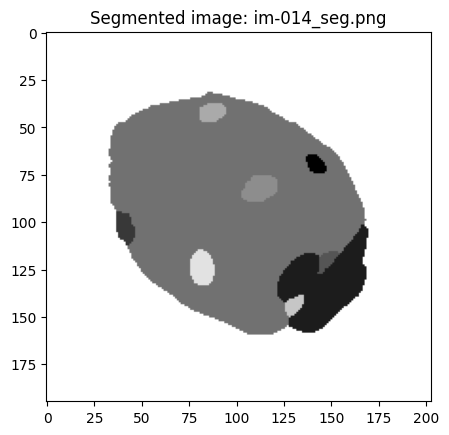

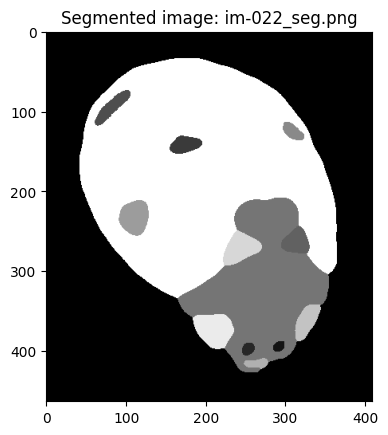

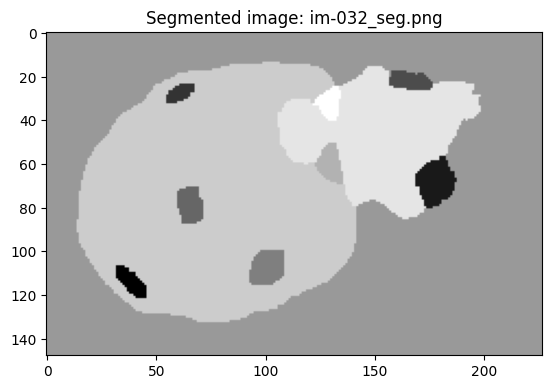

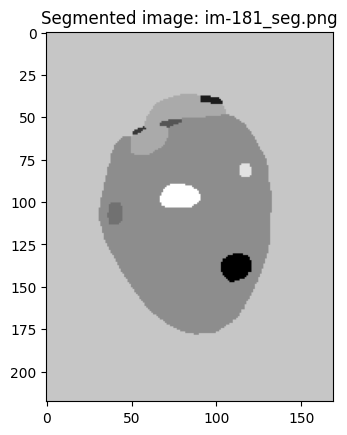

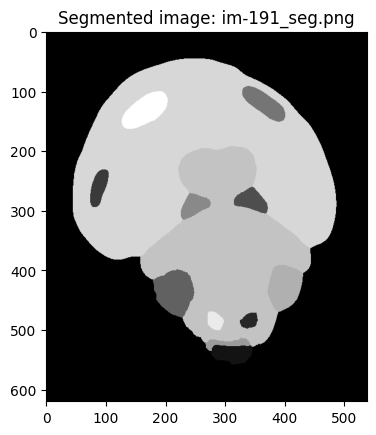

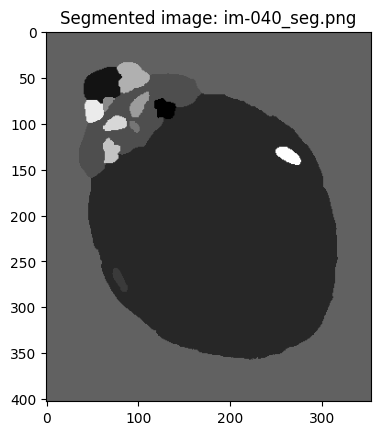

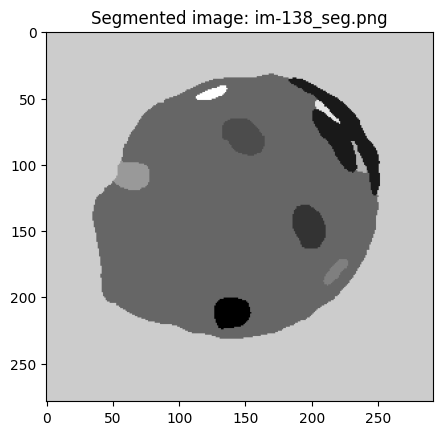

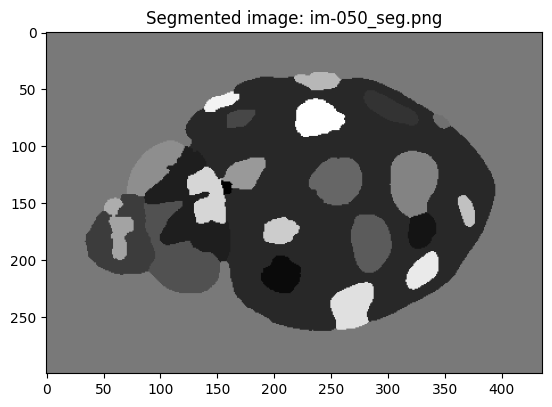

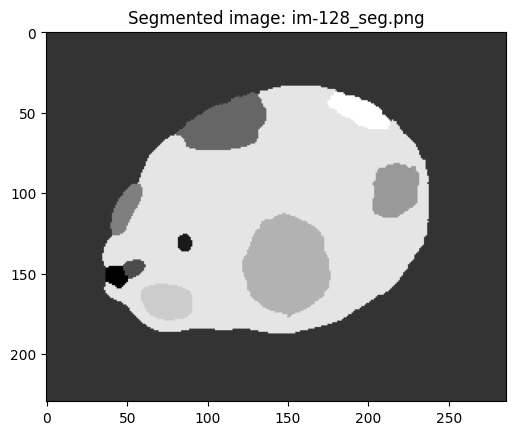

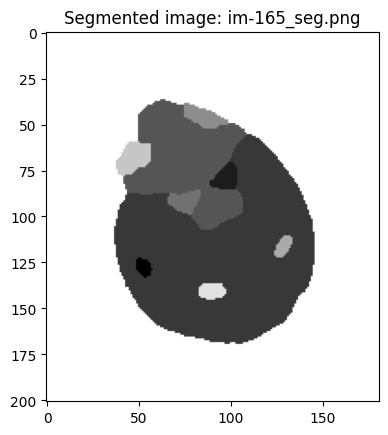

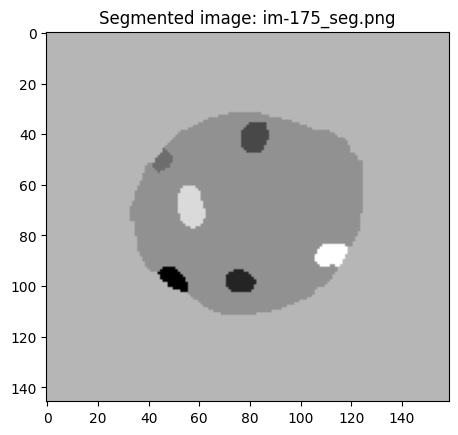

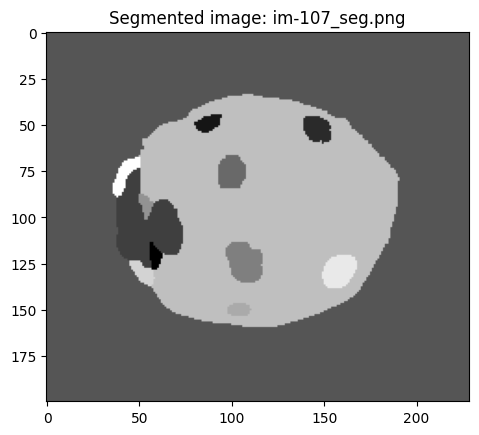

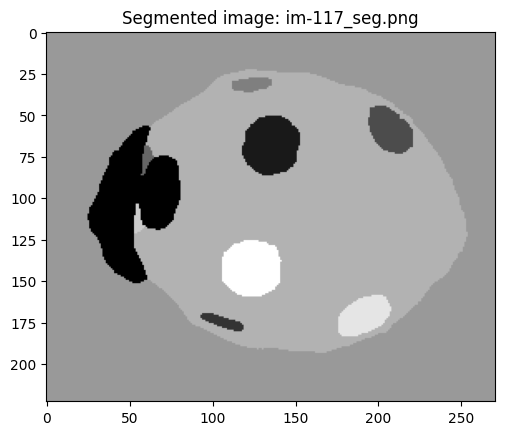

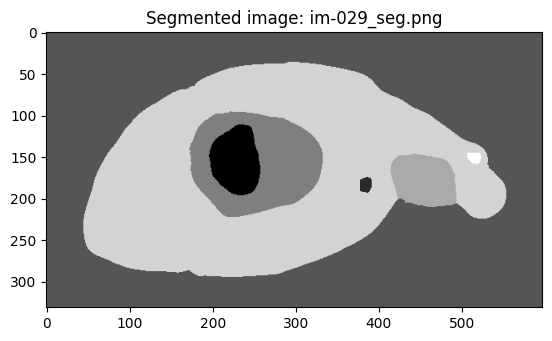

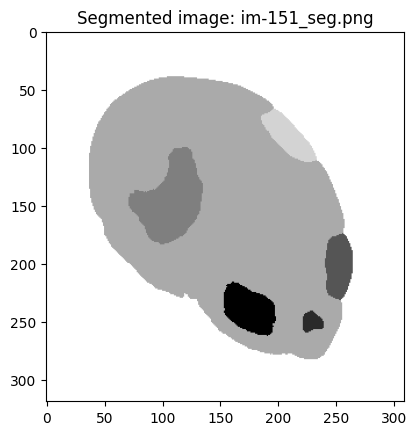

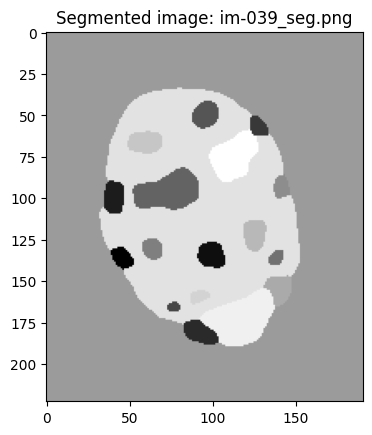

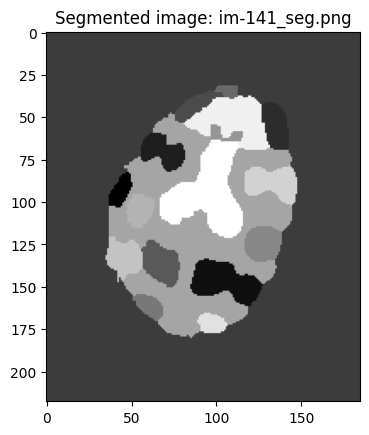

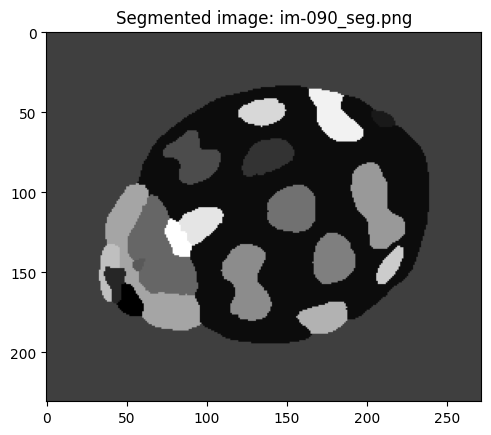

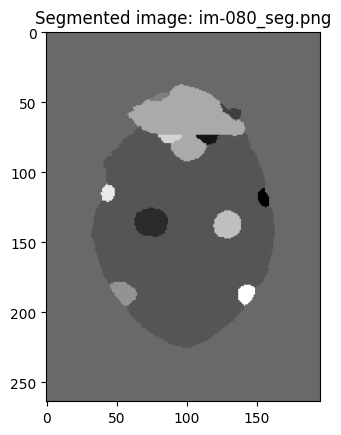

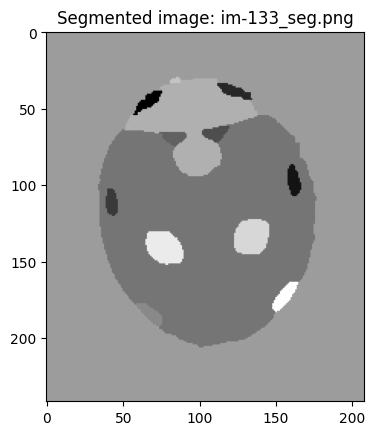

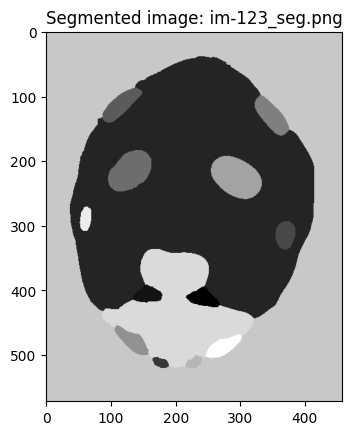

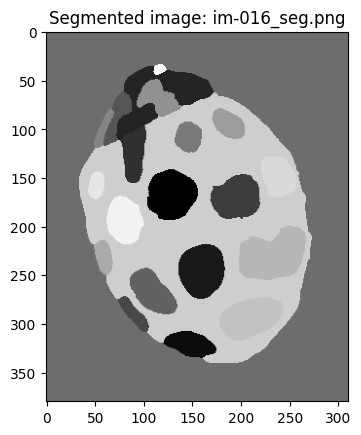

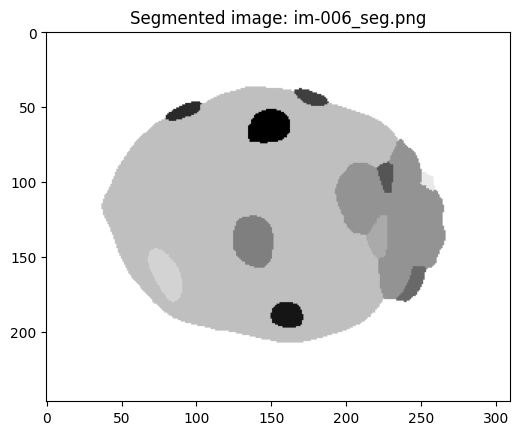

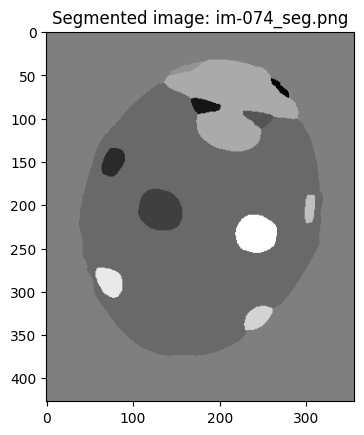

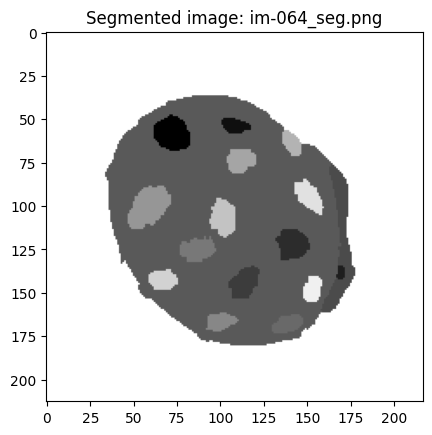

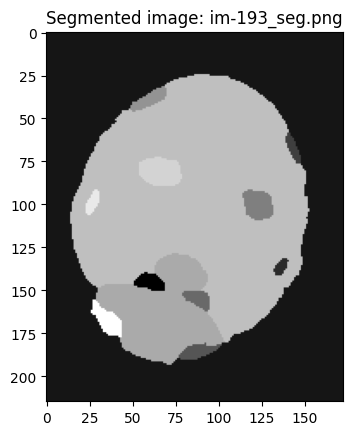

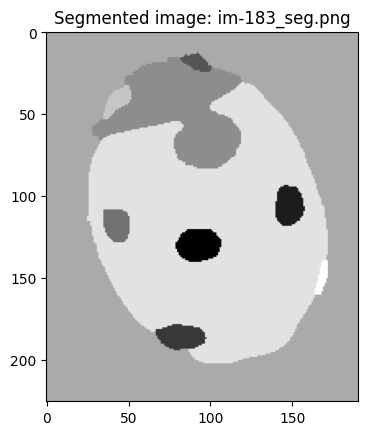

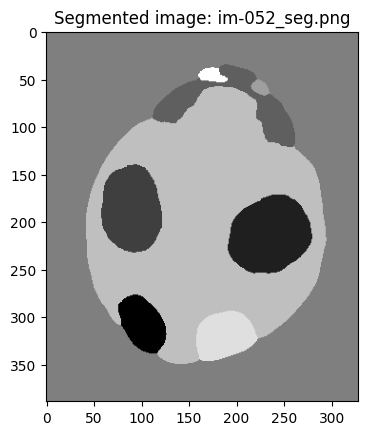

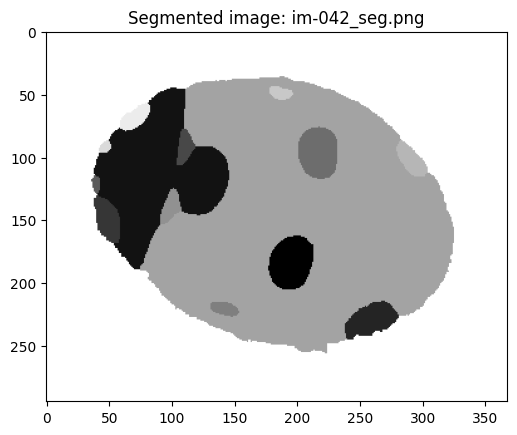

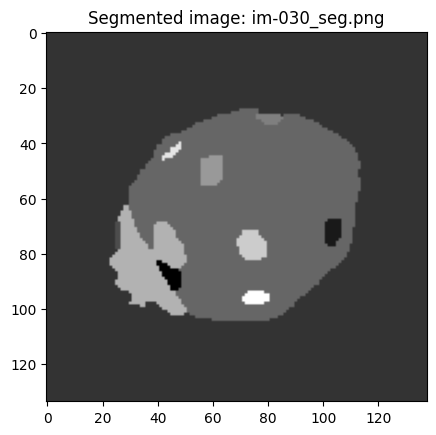

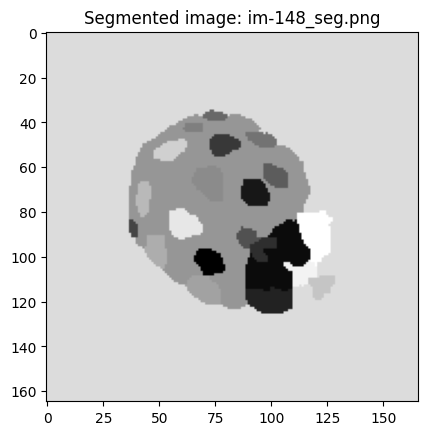

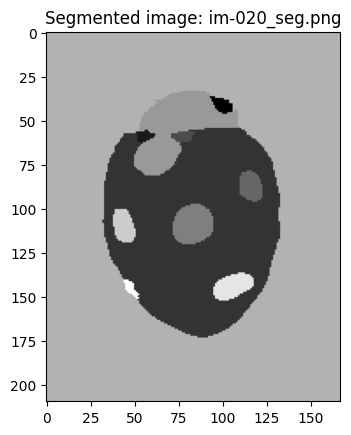

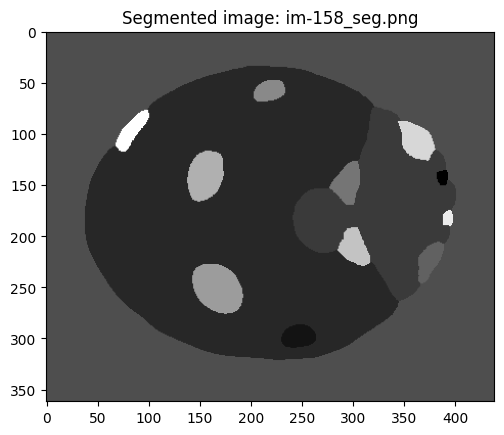

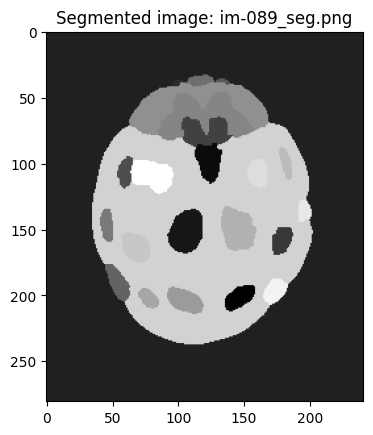

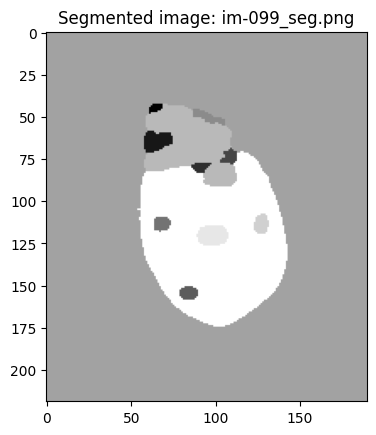

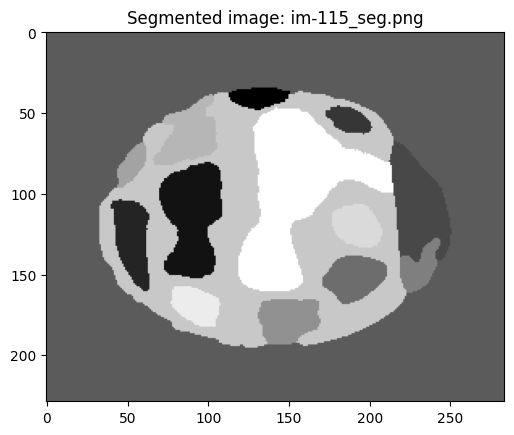

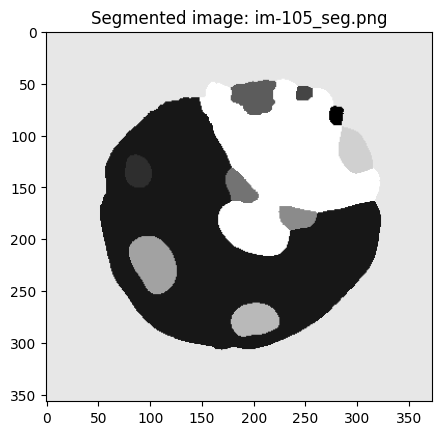

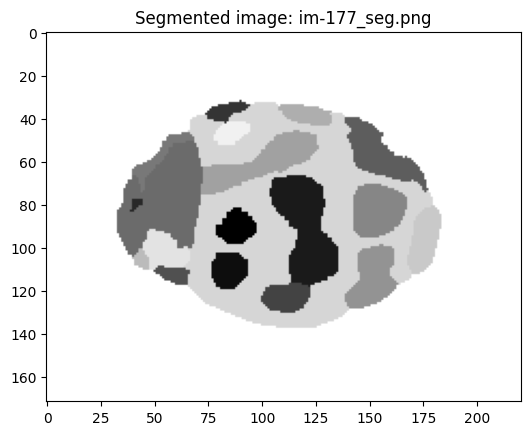

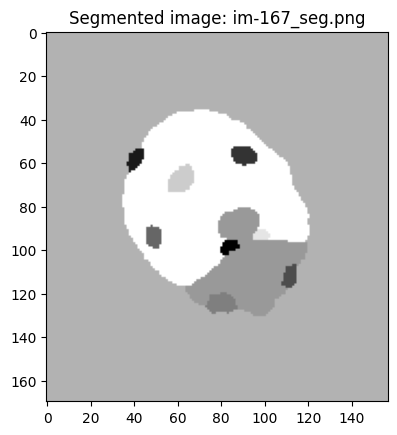

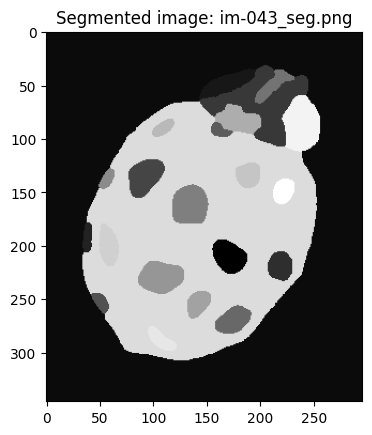

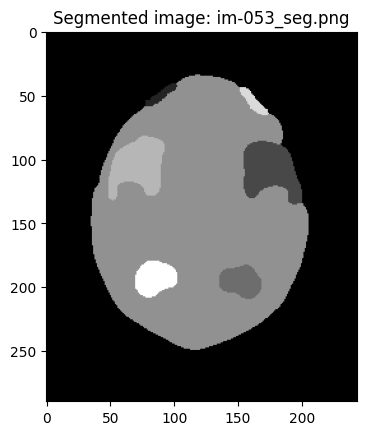

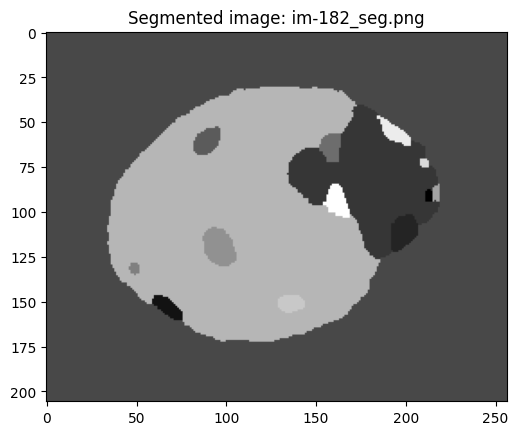

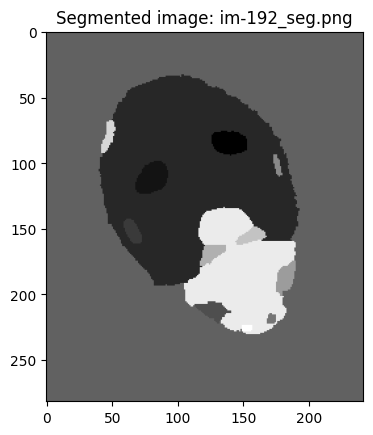

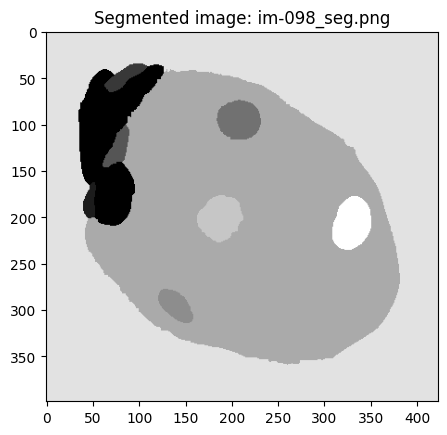

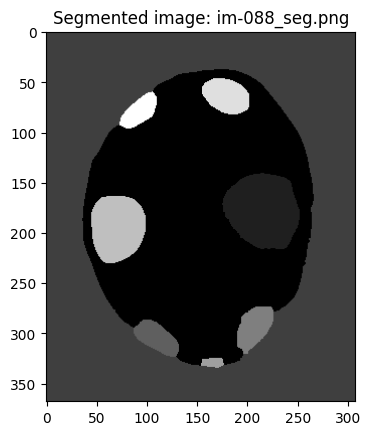

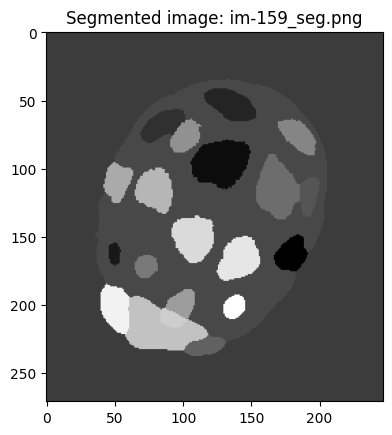

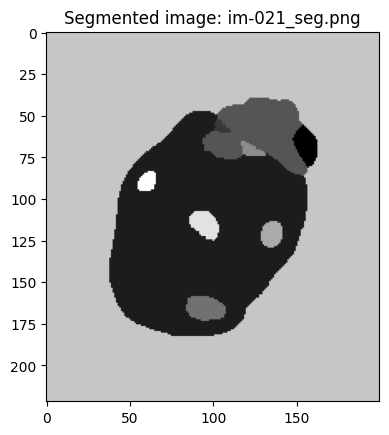

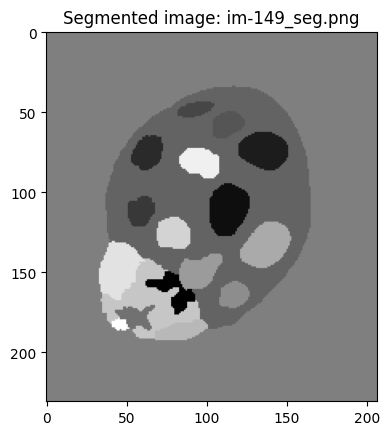

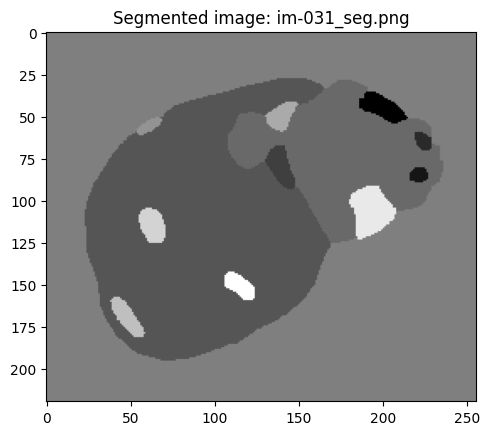

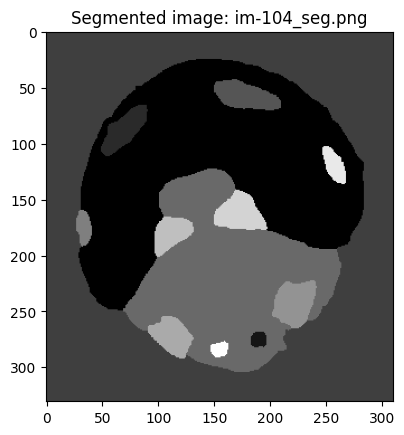

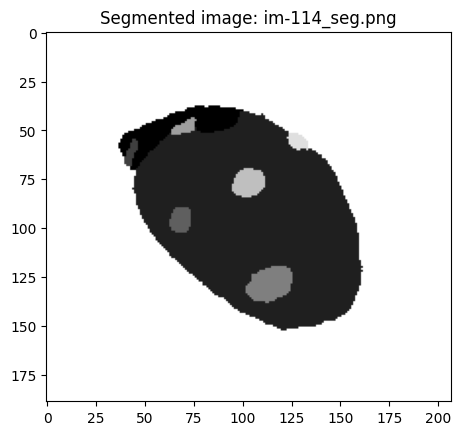

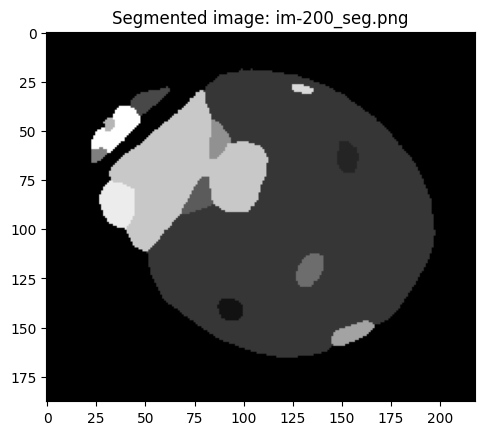

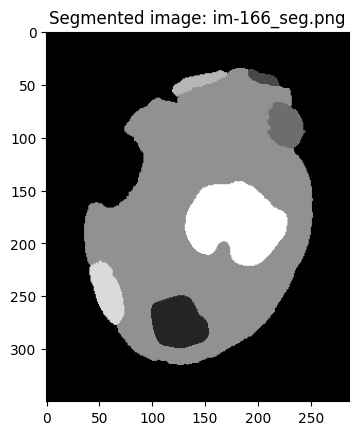

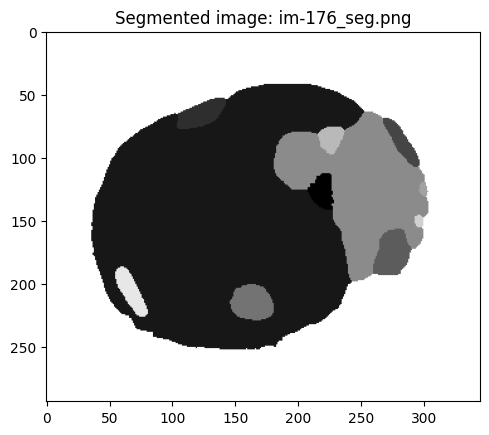

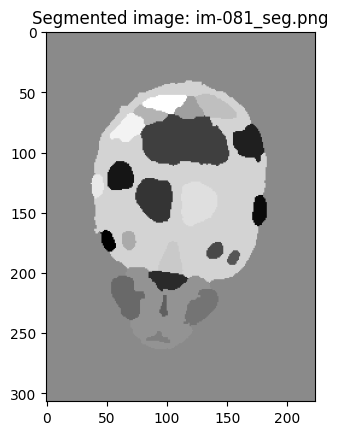

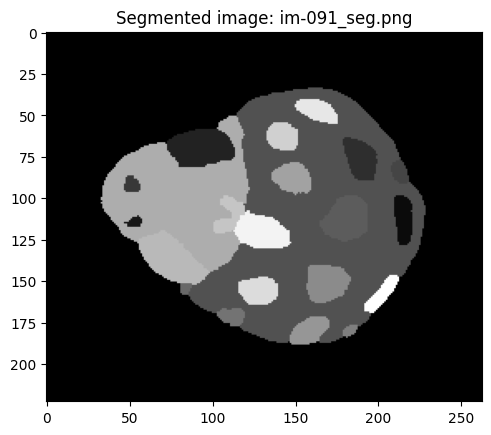

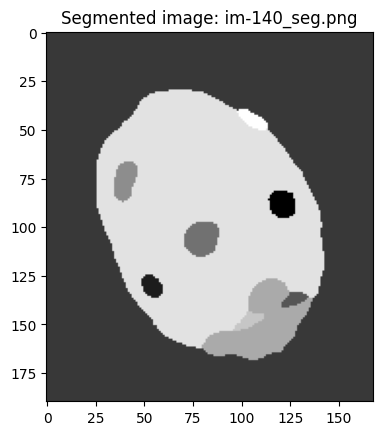

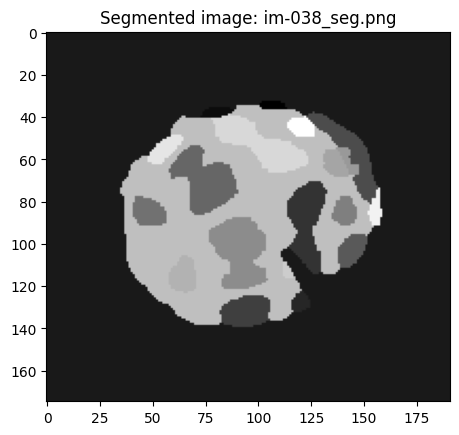

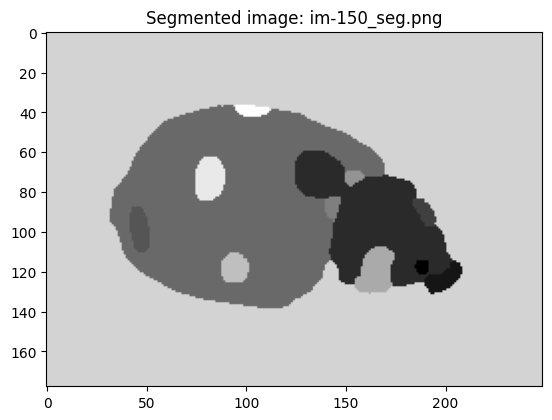

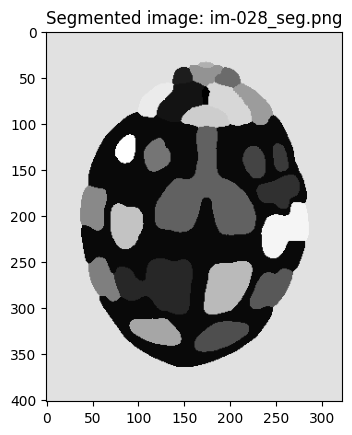

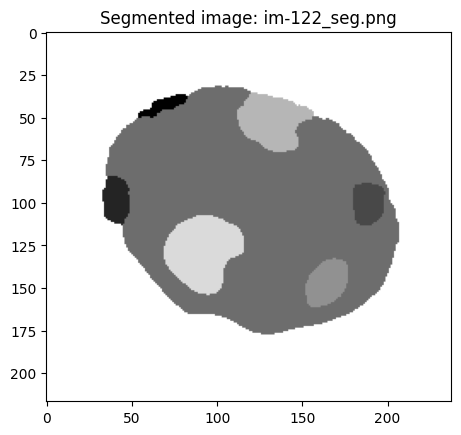

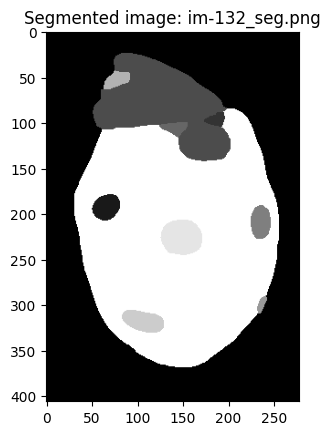

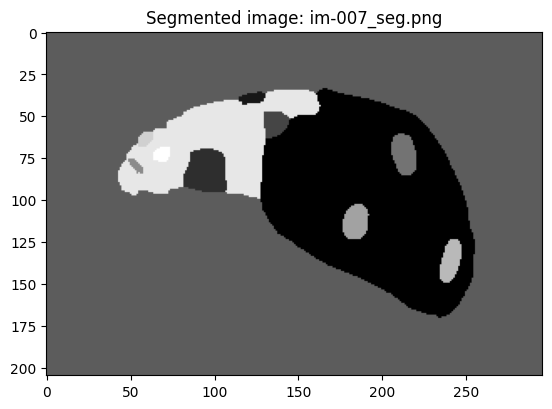

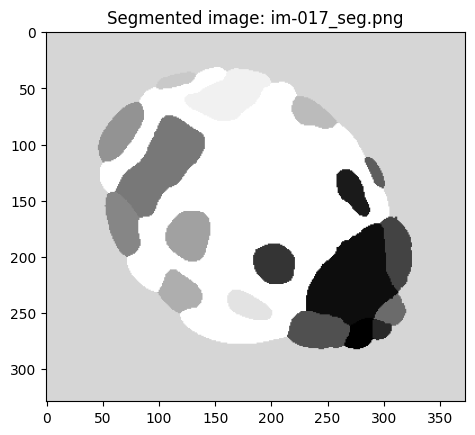

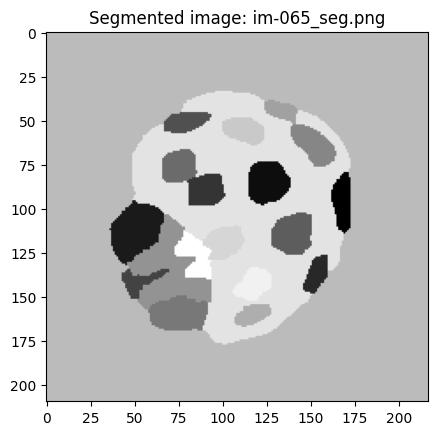

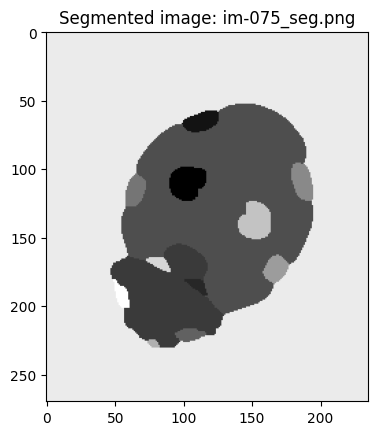

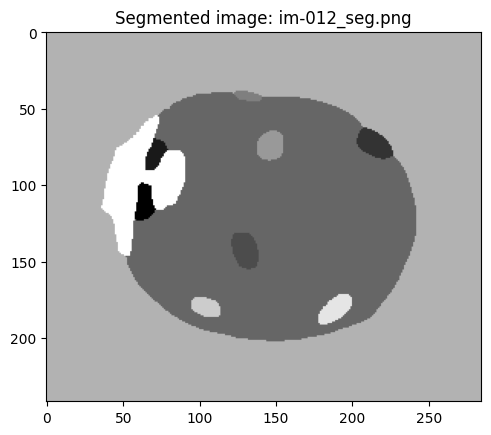

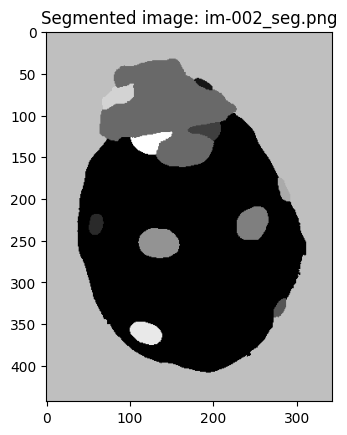

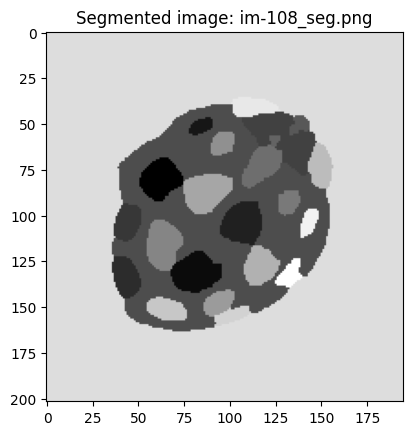

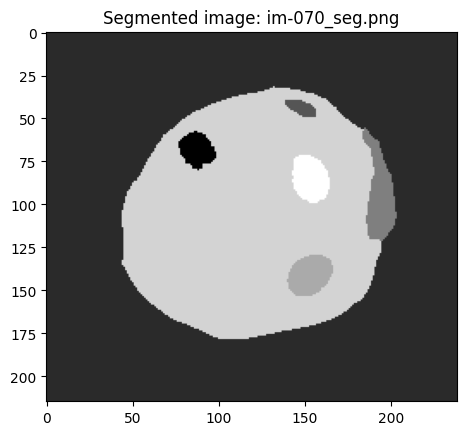

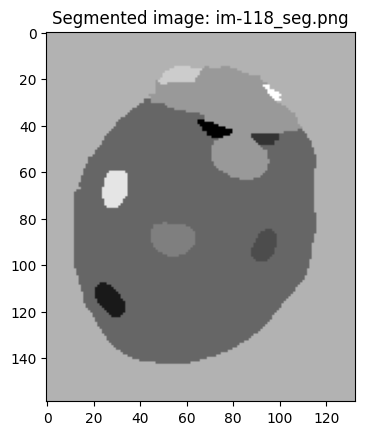

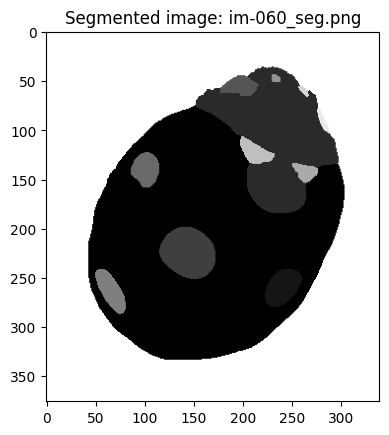

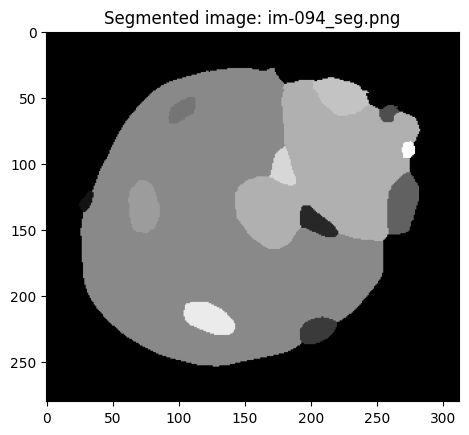

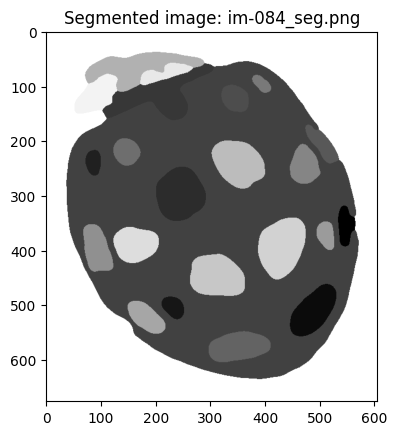

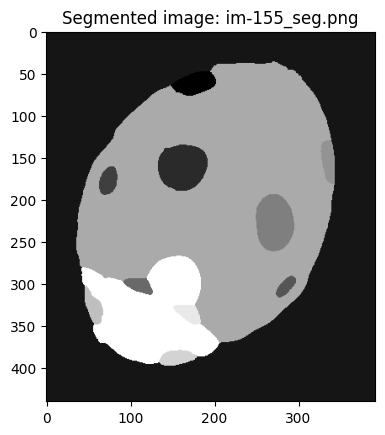

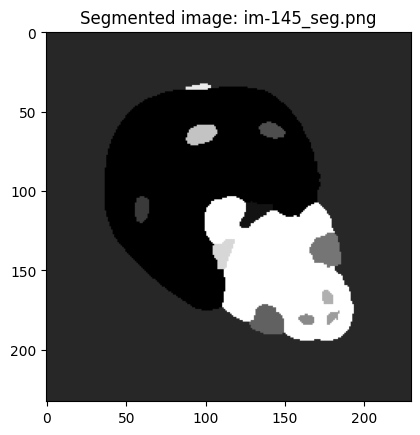

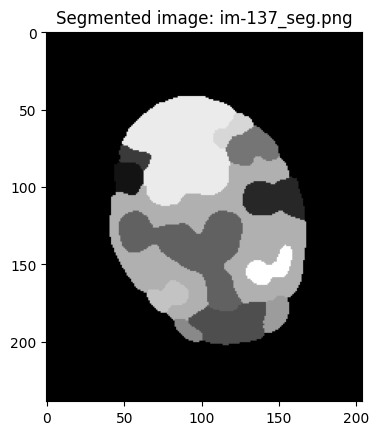

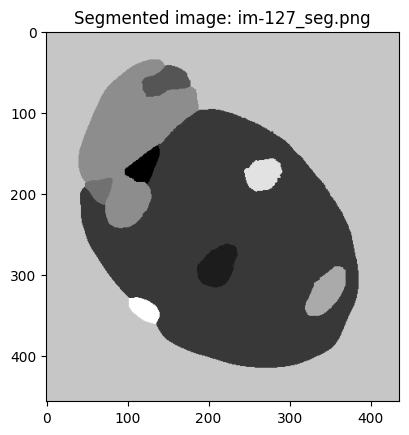

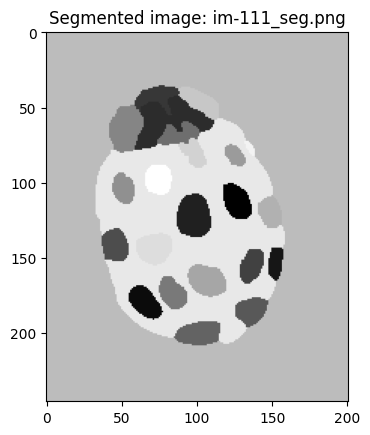

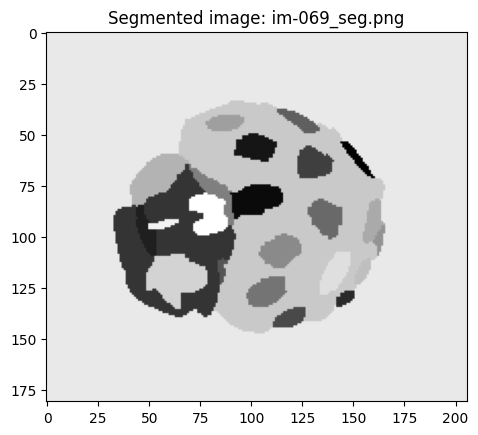

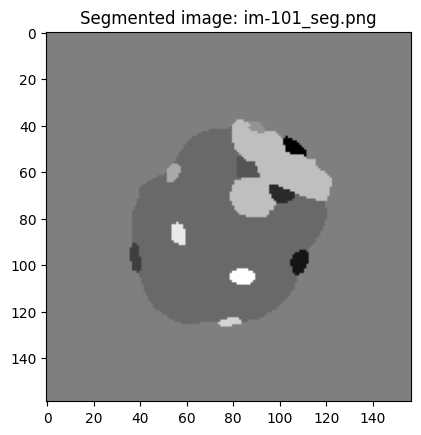

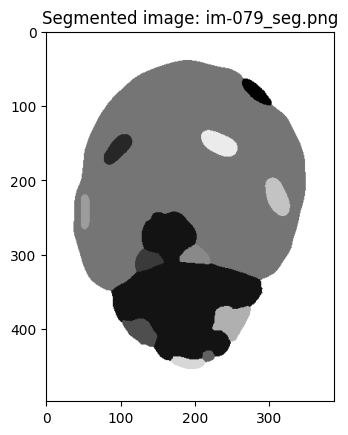

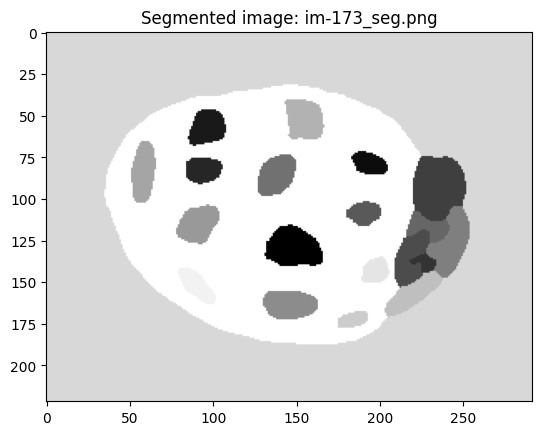

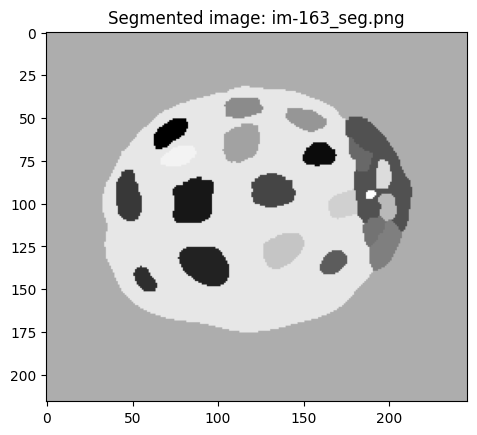

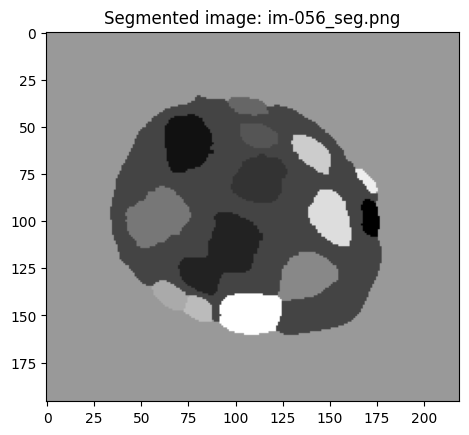

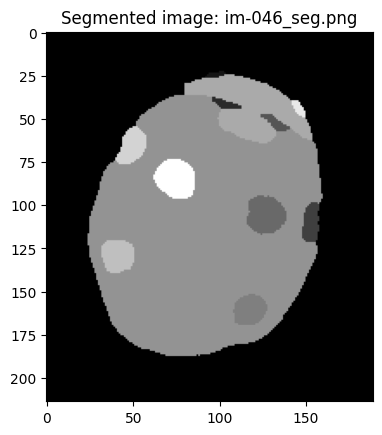

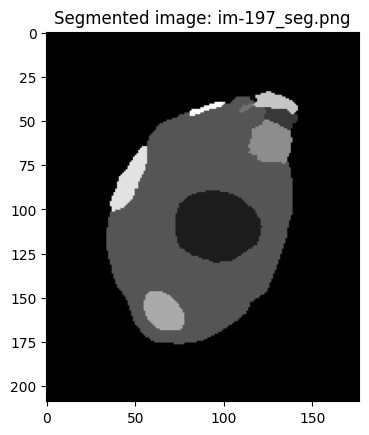

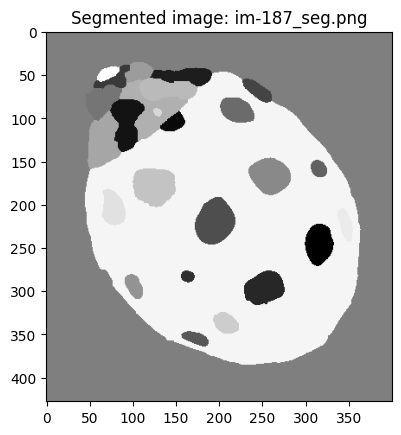

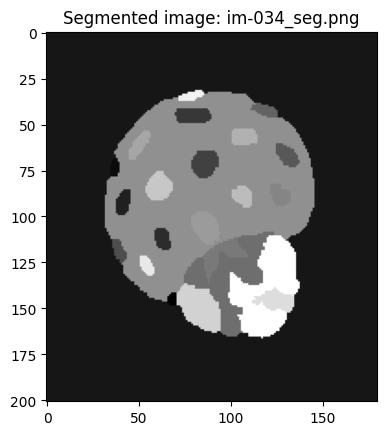

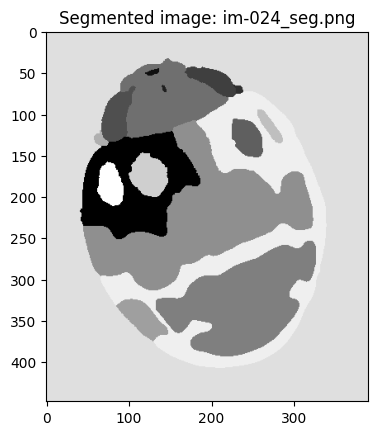

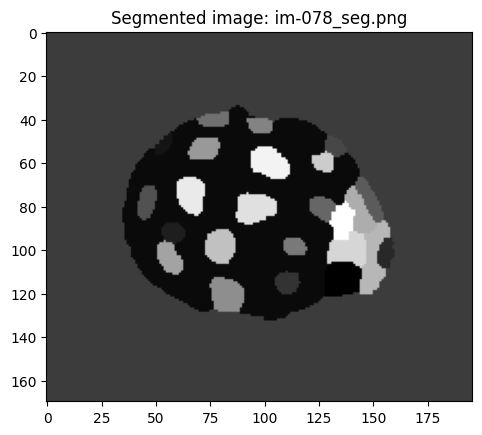

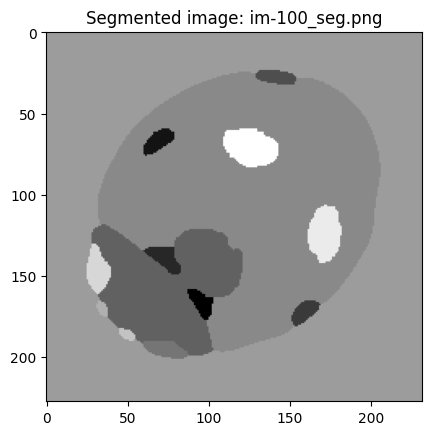

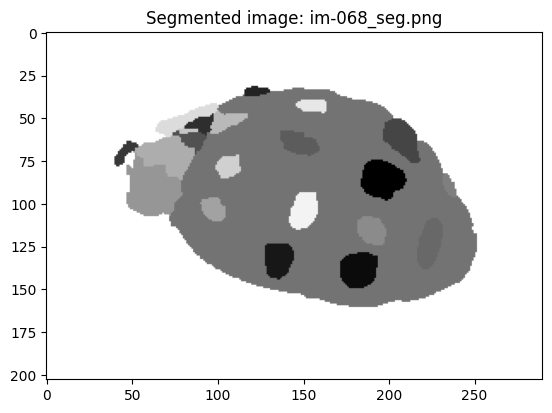

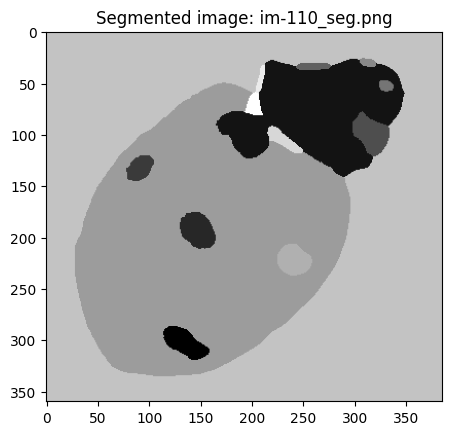

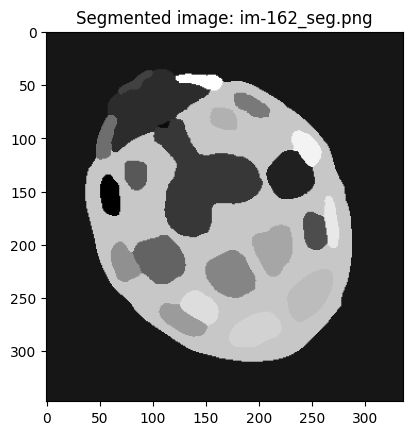

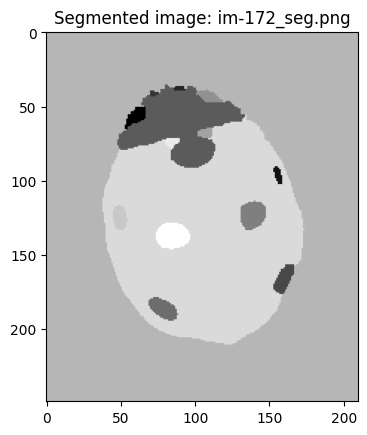

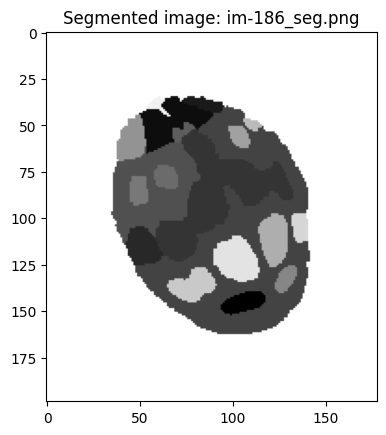

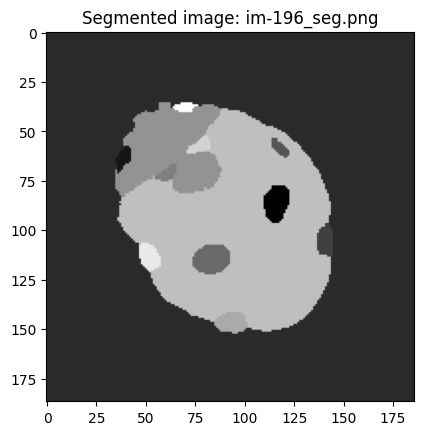

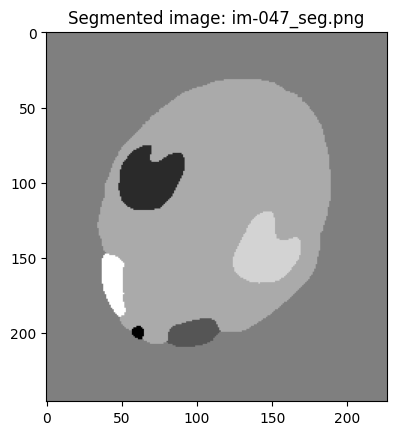

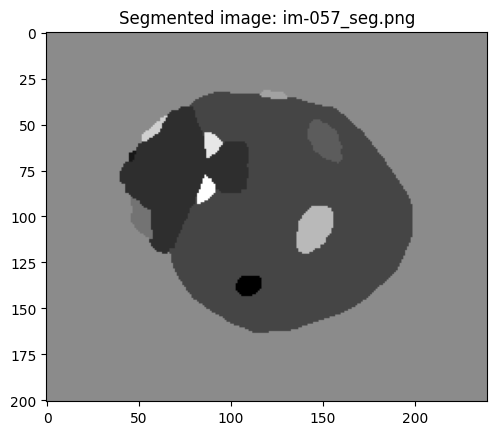

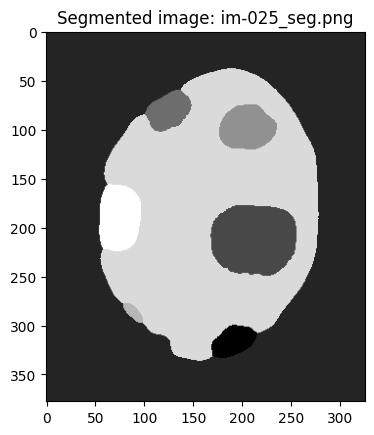

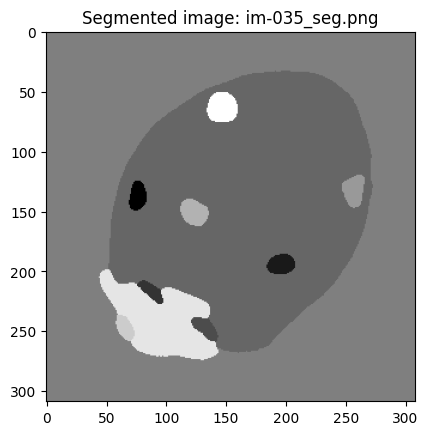

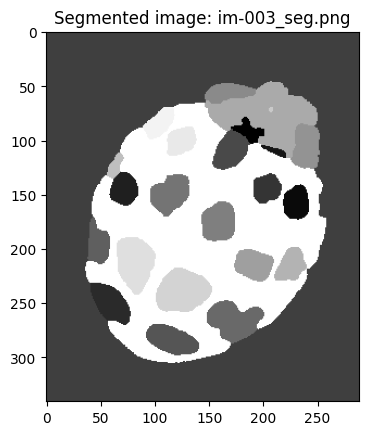

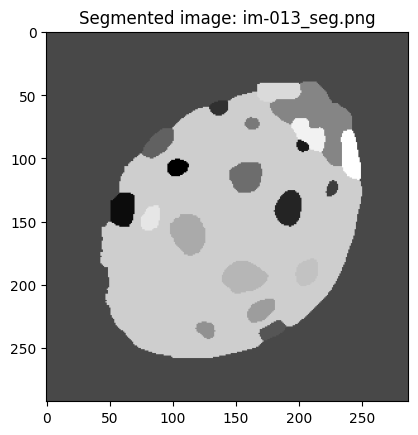

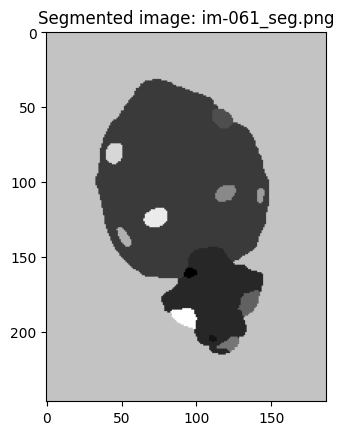

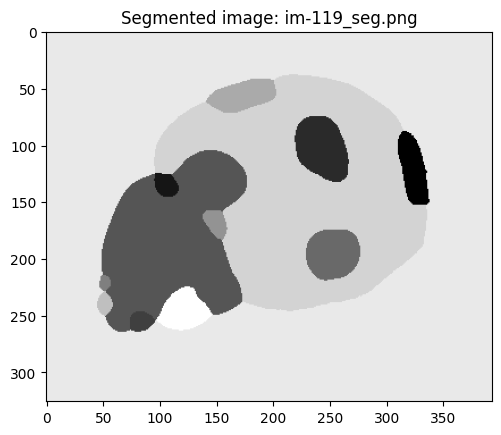

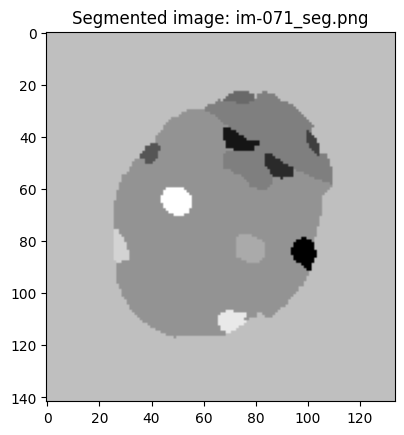

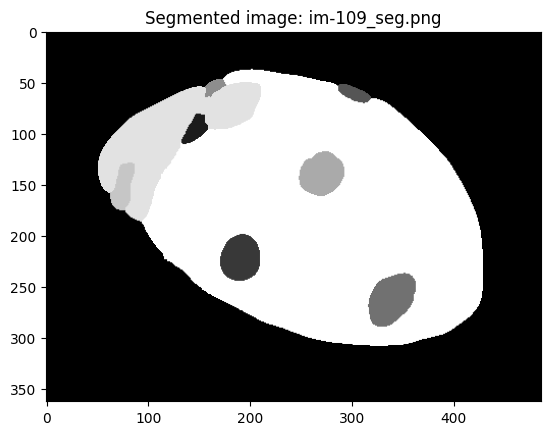

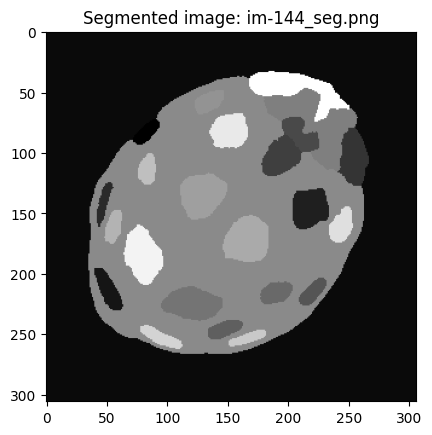

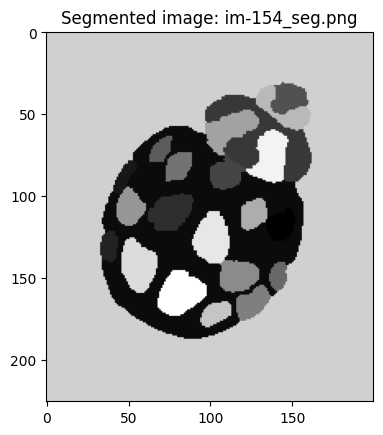

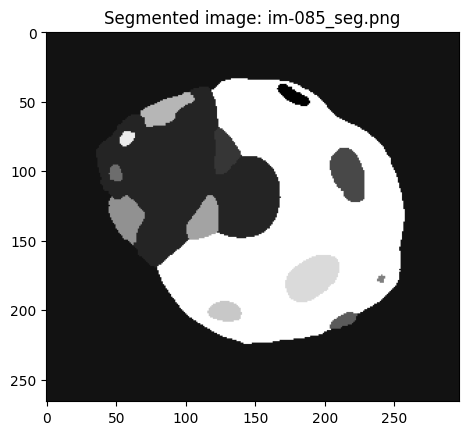

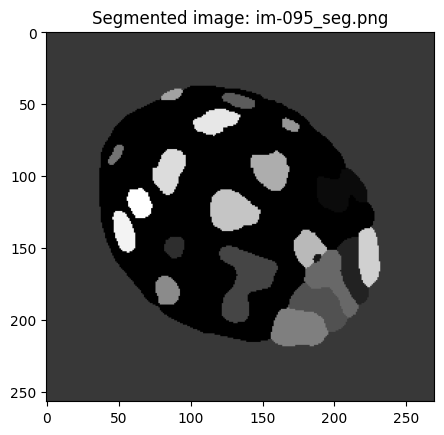

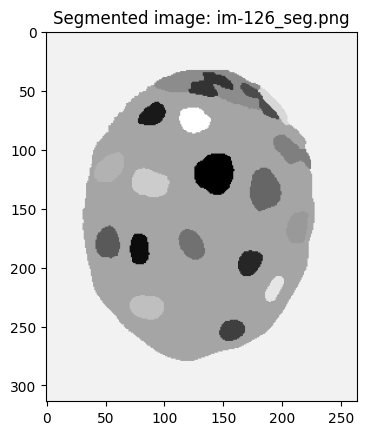

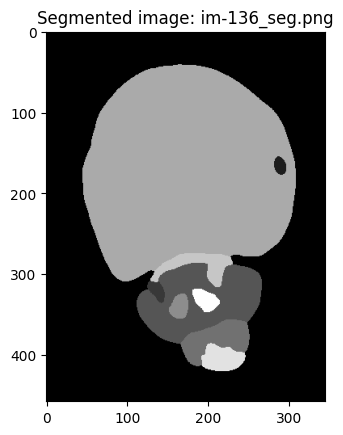

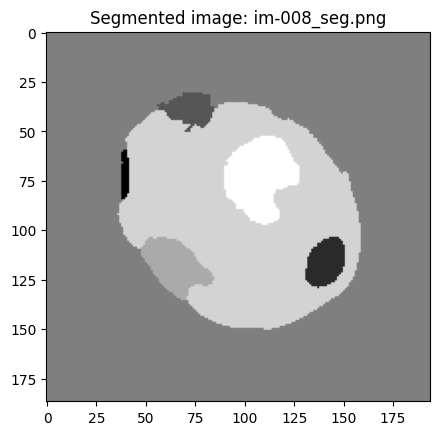

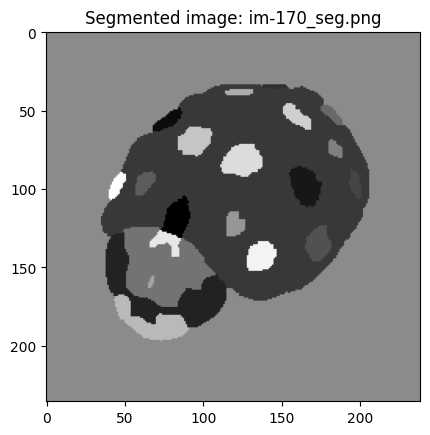

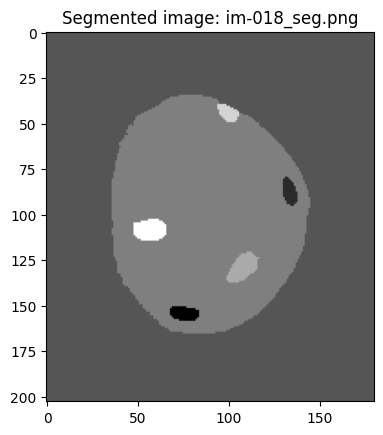

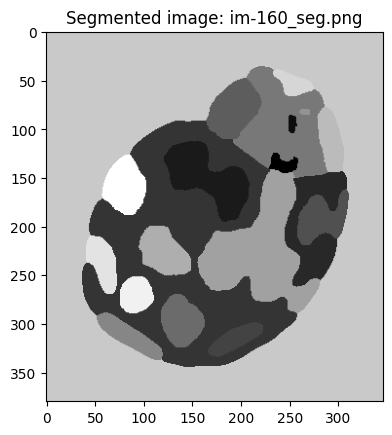

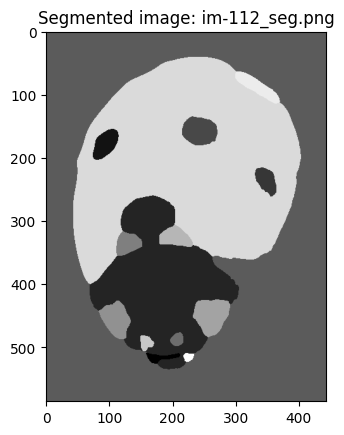

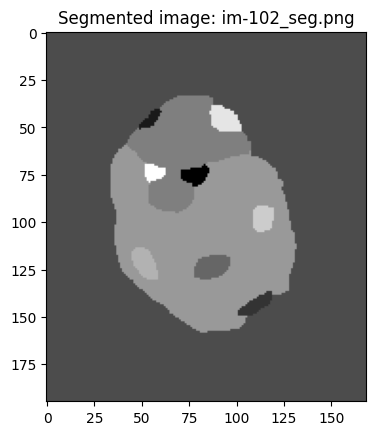

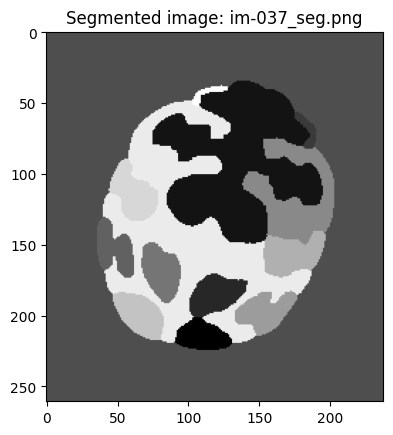

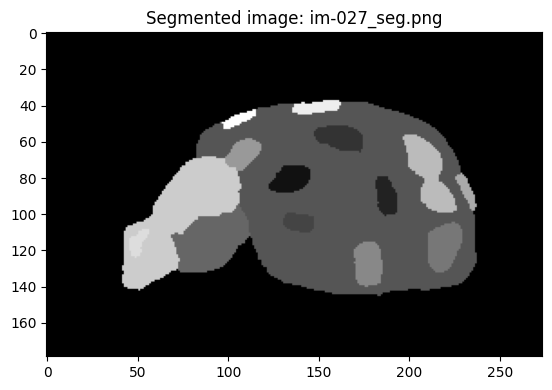

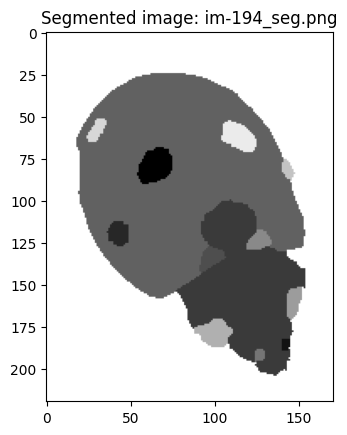

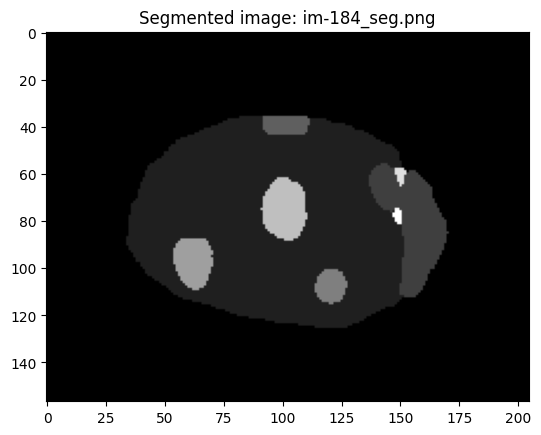

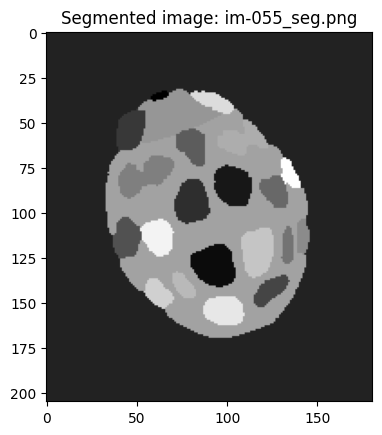

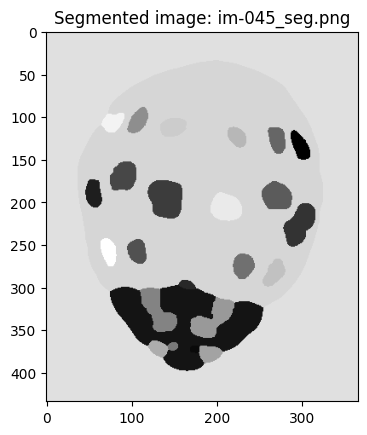

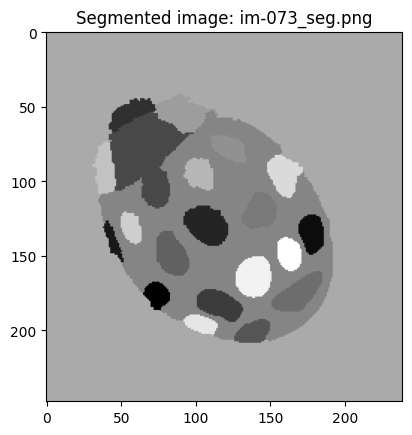

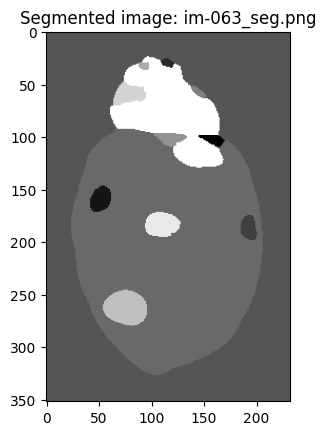

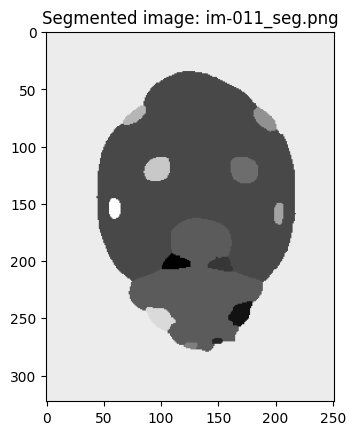

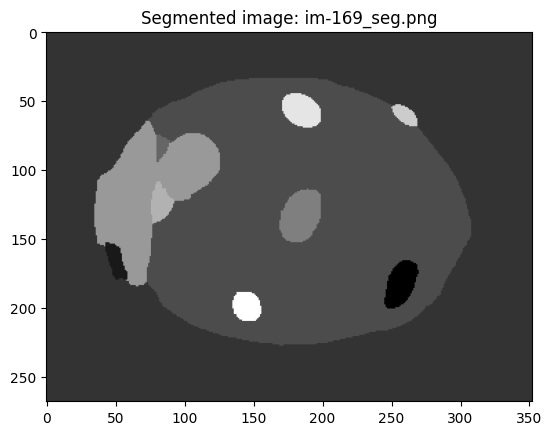

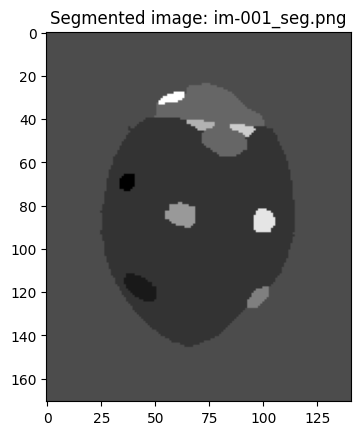

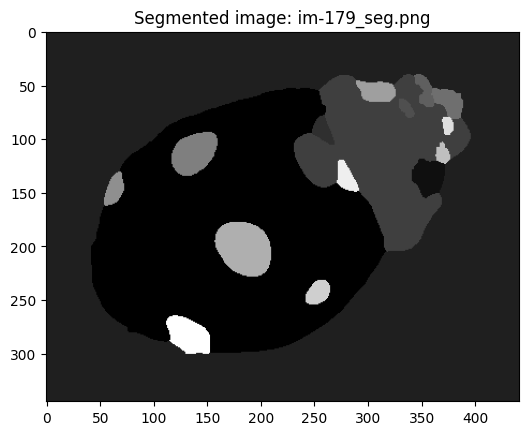

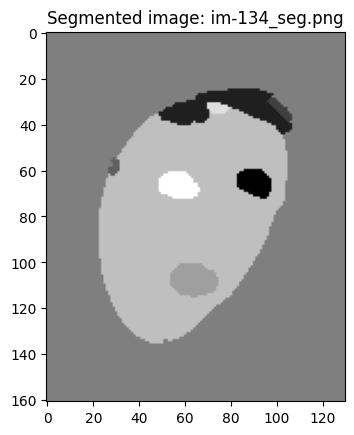

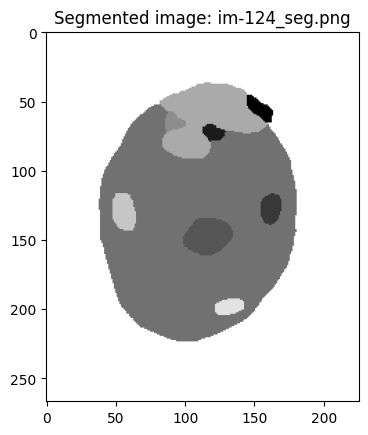

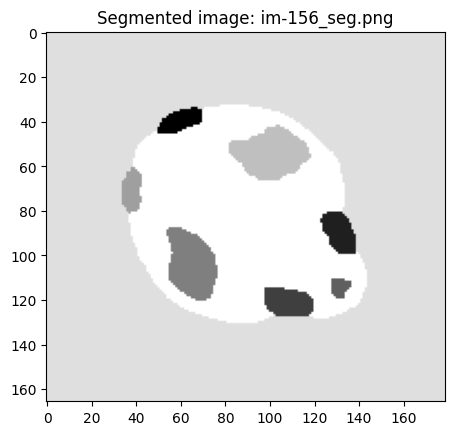

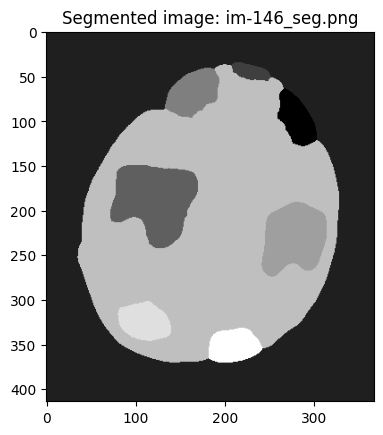

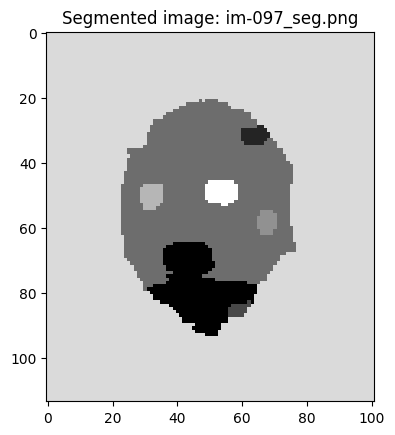

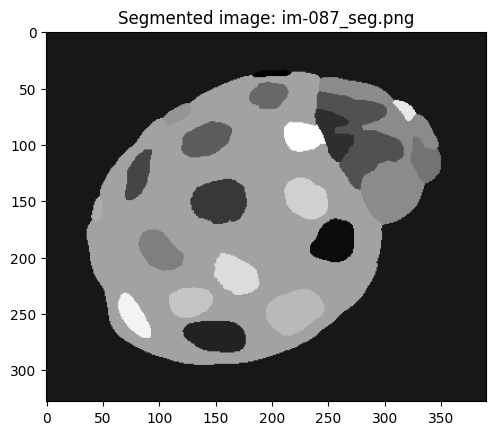

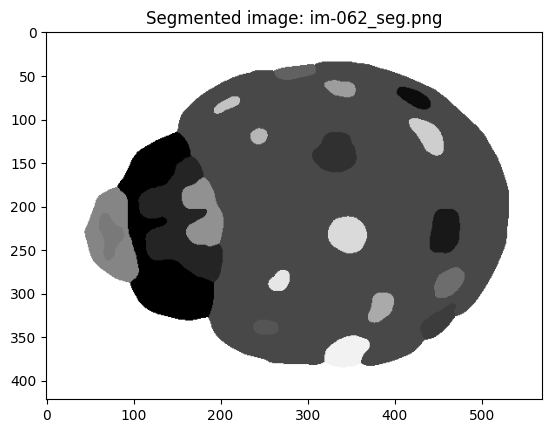

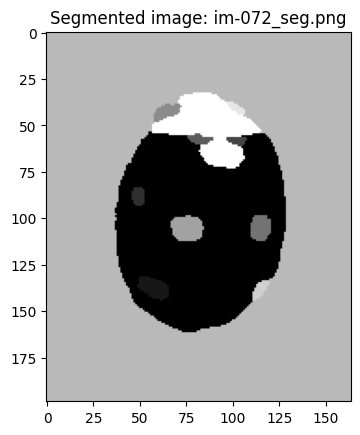

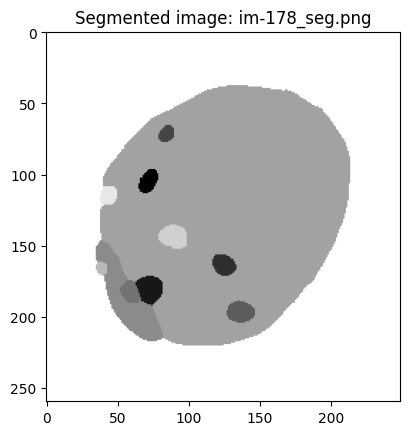

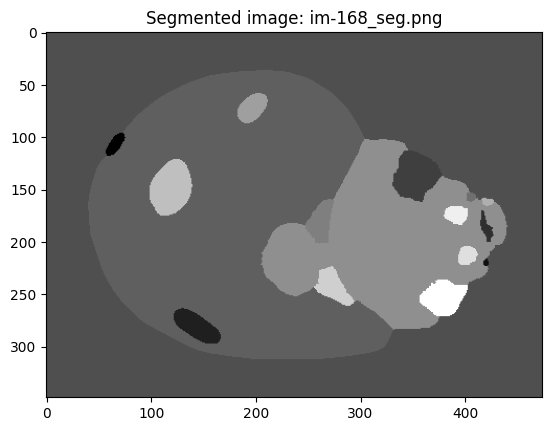

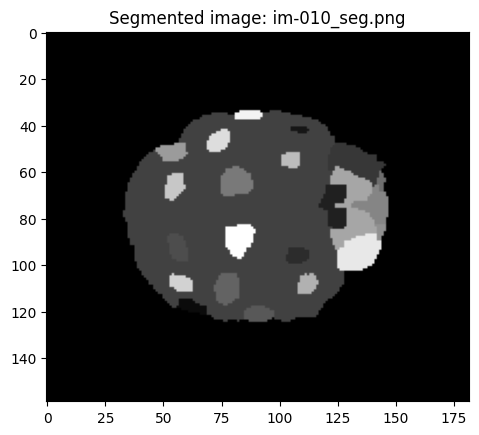

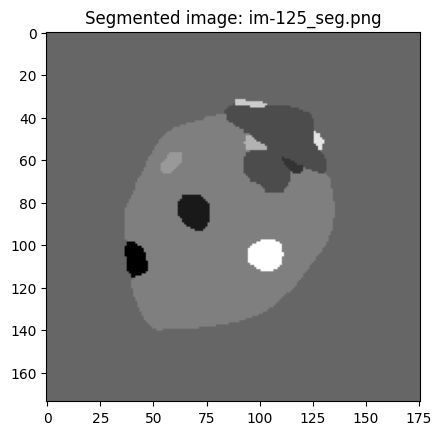

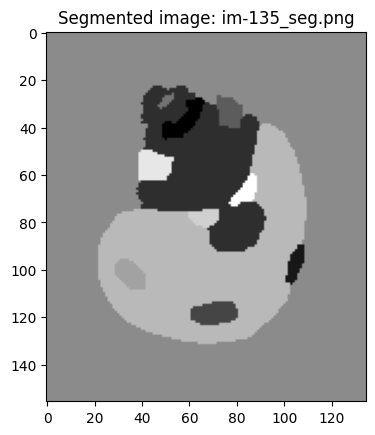

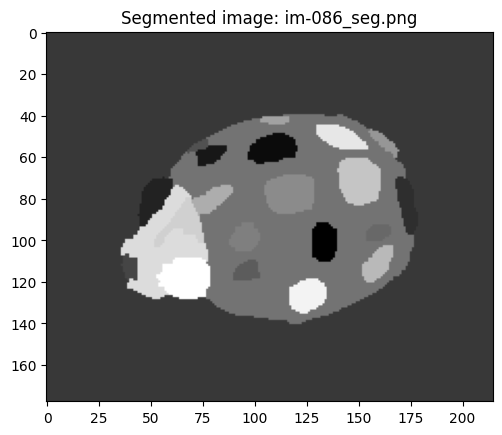

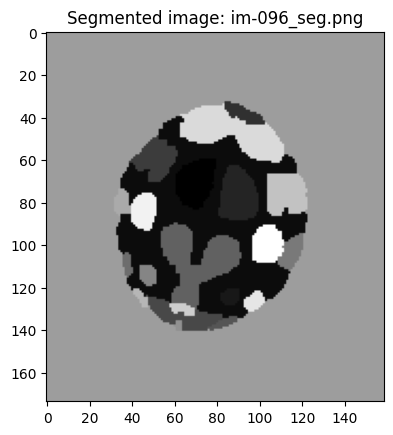

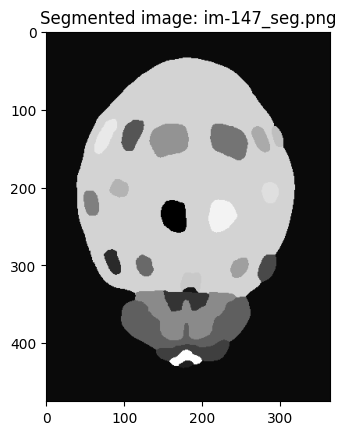

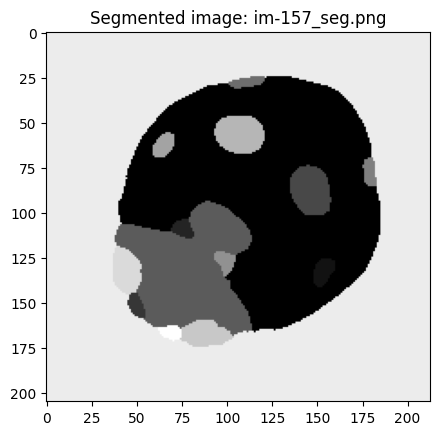

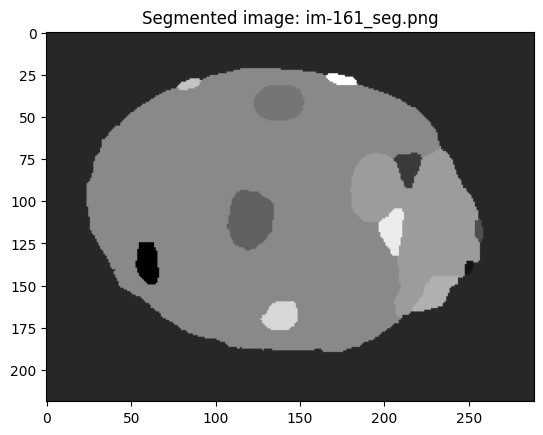

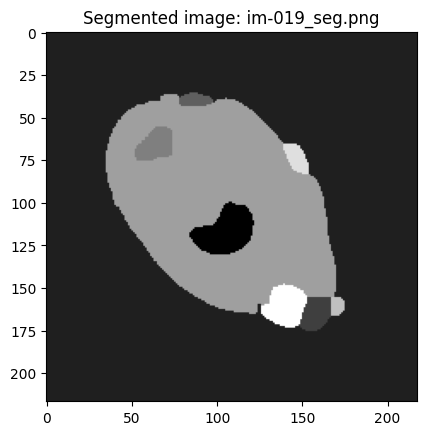

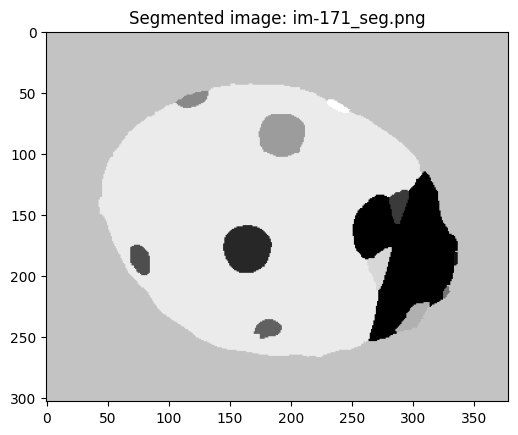

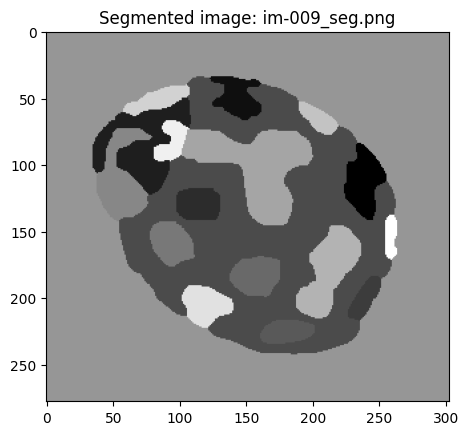

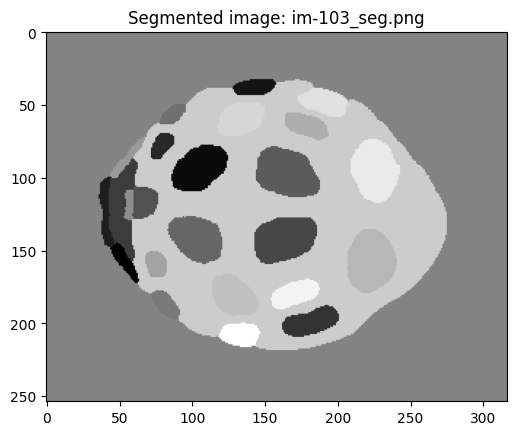

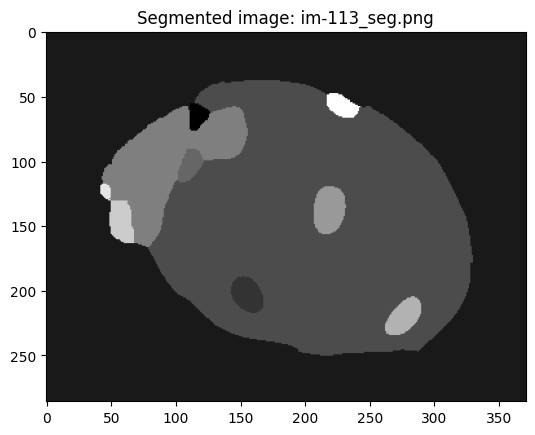

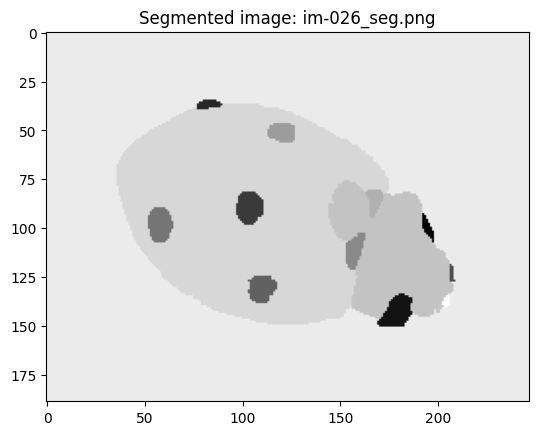

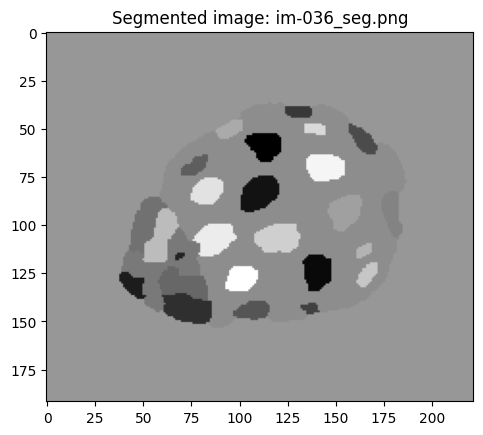

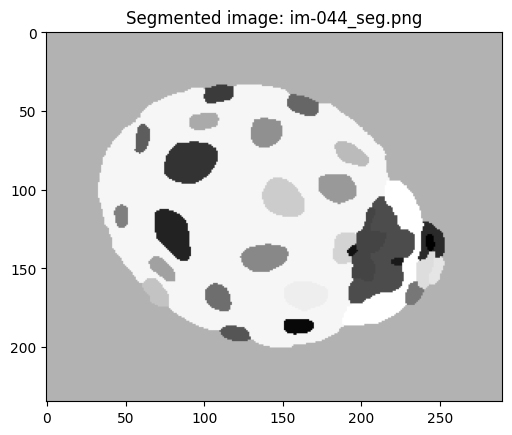

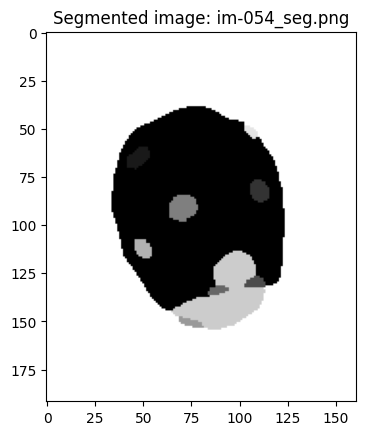

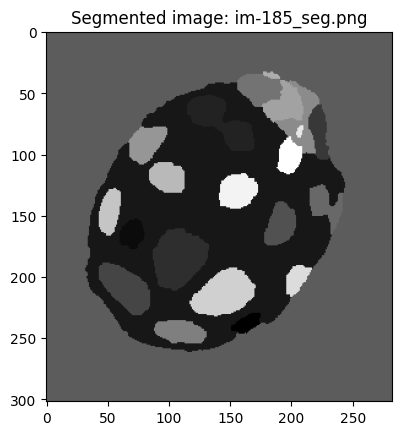

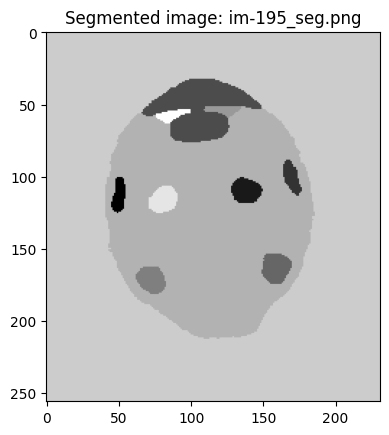

In [3]:
import matplotlib.pyplot as plt

# Load the segmentation image
for seg_file in seg_files:
    seg_img = Image.open(os.path.join(image_dir, seg_file))

    # Convert the image into a numpy array
    seg_array = np.array(seg_img)

    # Display the image
    plt.imshow(seg_array, cmap='gray')
    plt.title(f"Segmented image: {seg_file}")
    plt.show()


**Data Exploration**

In [5]:
labels = pd.read_csv('training_labels.csv')

# View Data
labels.head()

Image_id  Label  spot_number
0   im-001      0            6
1   im-002      0            7
2   im-003      1           18
3   im-004      1           19
4   im-005      1           18

label distribution among the training dataset are :

0    100
1    100
Name: Label, dtype: int64


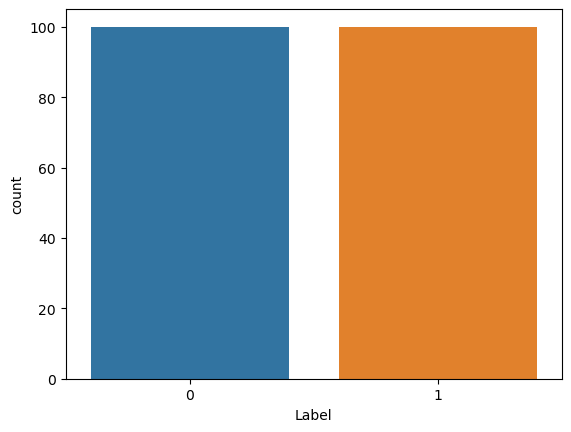

In [6]:
# Check the distribution of the labels
print(labels['Label'].value_counts())

# Visualize the distribution of the labels
sns.countplot(x='Label', data=labels)
plt.show()

The spot number distribution will give you an understanding of the distribution of spots among the ladybugs in your dataset.

5     34
7     34
4     24
6     22
17    21
18    12
15    12
19    11
14     7
16     5
2      5
12     3
13     3
3      2
1      2
20     1
10     1
11     1
Name: spot_number, dtype: int64


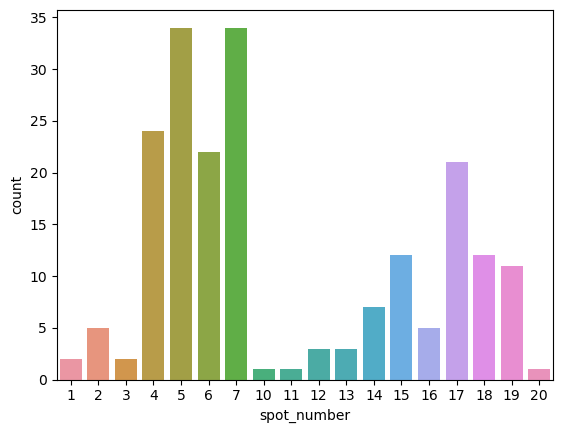

In [7]:
print(labels['spot_number'].value_counts())
sns.countplot(x='spot_number', data=labels)
plt.show()

Here, we are going to iterate over each row of the labels DataFrame, construct the corresponding image file name, and copy the image to the appropriate directory depending on the species.

In [8]:
# Create folders to save images
if not os.path.exists('quality_control'):
    os.makedirs('quality_control')
    os.makedirs('quality_control/Class_0', exist_ok=True)
    os.makedirs('quality_control/Class_1', exist_ok=True)

# Create folders to save images
for i in labels_df.index:
    img_id = labels_df.loc[i, 'Image_id']
    label = labels_df.loc[i, 'Label']
    img = cv2.imread(f'{image_dir}/{img_id}_im.png')
    
    if img is not None:
        cv2.imwrite(f'quality_control/{label}/{img_id}_im.png', img)
    else:
        print(f"Failed to read image: {img_id}_im.png")


**Feature Extraction**

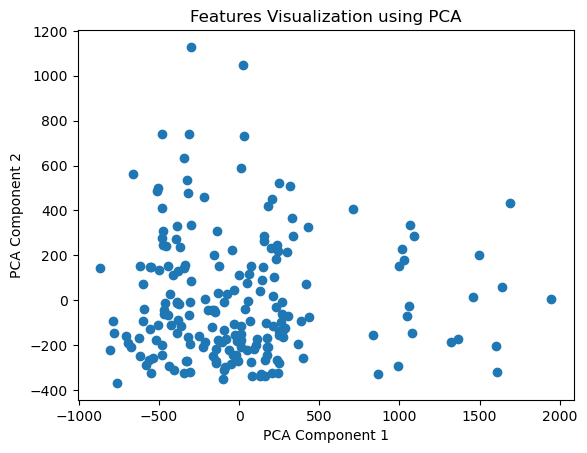

In [9]:
import numpy as np
import cv2
import glob
import pandas as pd
from skimage import measure
from matplotlib import pyplot as plt

# Load images and corresponding segmentation
images = []
segmentations = []
image_ids = []
for filename in glob.glob('training/*.png'): # Adjust path to images
    if '_im.png' in filename:
        img = cv2.imread(filename)
        img_resized = cv2.resize(img, (64, 64)) # Resizing image to a common size
        images.append(img_resized)
        seg_filename = filename.replace("_im.png", "_seg.png") 
        seg_img = cv2.imread(seg_filename, cv2.IMREAD_GRAYSCALE)
        seg_resized = cv2.resize(seg_img, (64, 64)) # Resizing segmentation to a common size
        segmentations.append(seg_resized)
        image_ids.append(filename.split('/')[-1].split('_')[0]) # extracting image id from the filename

images = np.array(images)
segmentations = np.array(segmentations)

# Extract color histogram features
color_features = []
color_columns = ['color_hist_' + str(i) for i in range(768)]  # Assuming 256 bins for each RGB channel
for img in images:
    color_hist = np.hstack([cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]).flatten()
    color_features.append(color_hist)
color_features = np.array(color_features)

# Extract shape features
shape_features = []
shape_columns = ['area', 'perimeter', 'compactness']
for seg in segmentations:
    labels = measure.label(seg)
    regions = measure.regionprops(labels)
    # We will consider the properties of the largest region in the segmentation
    largest_region = max(regions, key=lambda region: region.area)
    area = largest_region.area
    perimeter = largest_region.perimeter
    compactness = perimeter**2 / area if area else 0
    shape_features.append([area, perimeter, compactness])
shape_features = np.array(shape_features)

# Combine color and shape features into a single DataFrame
features = pd.DataFrame(np.hstack([color_features, shape_features]), columns=color_columns+shape_columns)

# Add image IDs to the features DataFrame
features['Image_id'] = image_ids

# Reorder DataFrame columns
cols = features.columns.tolist()
cols = cols[-1:] + cols[:-1]
features = features[cols]

# Save to CSV
features.to_csv('extracted_features.csv', index=False)

# Visualization using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.iloc[:, 1:])  # exclude Image_id for PCA

plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.title('Features Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


The feature extraction method used in the provided code involves the extraction of color and shape features from images. Let's discuss each feature extraction step in more detail:

Color Histogram Features:
Color features are extracted by calculating histograms for each RGB channel of the resized images. This step quantifies the distribution of color values in the image. The code uses the cv2.calcHist() function to calculate the histogram for each channel, with a total of 256 bins per channel. The histograms are then concatenated and flattened into a single feature vector of length 768 (256 bins per channel multiplied by 3 channels). This representation captures the color information of the image.
Shape Features:
Shape features are extracted from the segmented regions in the images. The code uses the skimage.measure.regionprops() function to obtain properties of labeled regions in each segmentation mask. These properties include the area, perimeter, and other shape-related measurements of the regions. In this code, the largest region in each segmentation mask is selected based on its area, assuming it represents the object of interest. The area and perimeter of this largest region are extracted as shape features.
Combining Color and Shape Features:
The color and shape features extracted from each image are combined into a single DataFrame called "features". The color features are stored in columns named 'color_hist_i', where 'i' represents the bin index. The shape features are stored in columns named 'area', 'perimeter', and 'compactness'. The DataFrame also includes an 'Image_id' column to associate each set of features with the corresponding image. Combining color and shape features into a single DataFrame enables further analysis and machine learning tasks.
The combination of color and shape features provides a comprehensive representation of the visual characteristics of the images. Color features capture the distribution of color values, while shape features provide information about the object's size, boundary, and compactness. By combining these features, it becomes possible to represent and compare images based on their visual attributes.

The extracted features can be further utilized for various tasks, such as image classification, object recognition, or any other analysis requiring quantitative representations of image content.

to further visualize 

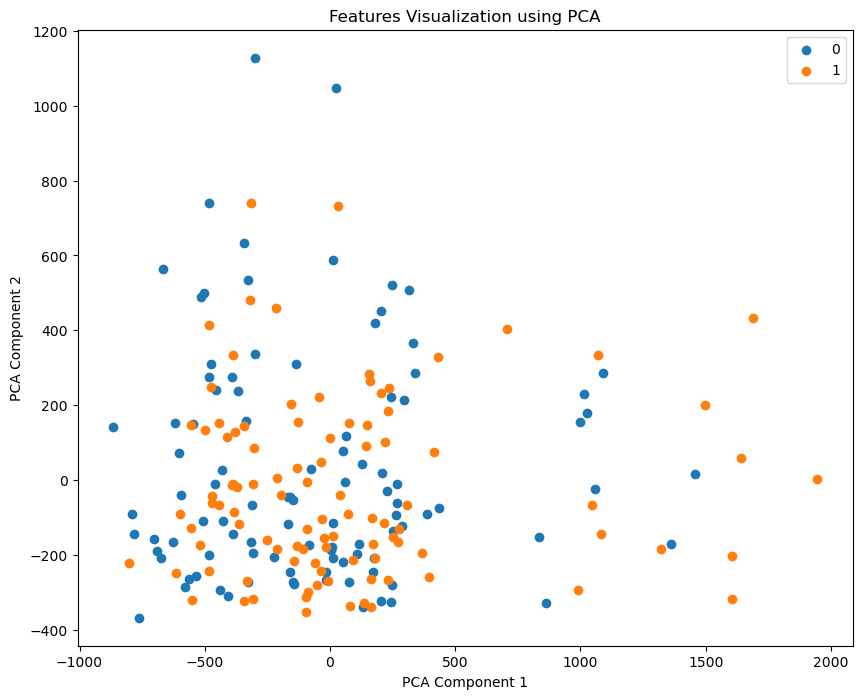

In [10]:
# Load labels
labels = pd.read_csv('training_labels.csv')
labels = labels.sort_values('Image_id')  # Ensure the order of labels is the same as features

# Visualization using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.iloc[:, 1:])  # exclude Image_id for PCA

plt.figure(figsize=(10, 8))
for label in labels['Label'].unique():
    plt.scatter(
        reduced_features[labels['Label'] == label, 0],
        reduced_features[labels['Label'] == label, 1],
        label=label
    )

plt.title('Features Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [23]:
from sklearn.cluster import KMeans

# Load extracted features from the CSV
features = pd.read_csv('extracted_features.csv')

# Exclude the 'Image_id' column from the features
X = features.iloc[:, 1:].values

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters you desire
kmeans.fit(X)

# Get cluster labels for the data points
cluster_labels = kmeans.labels_

# Add the cluster labels to the features DataFrame
features['Cluster'] = cluster_labels

# Print the cluster labels
print("Cluster Labels:", cluster_labels)


Cluster Labels: [0 2 2 0 2 0 0 0 2 1 2 2 2 0 1 2 2 0 0 0 0 1 2 2 2 0 1 2 2 0 2 2 0 0 2 0 2
 0 0 2 2 2 2 2 2 1 2 2 2 2 0 2 1 0 0 0 0 2 2 2 0 2 2 0 0 2 2 0 0 0 0 0 0 2
 0 1 2 0 2 0 0 0 2 1 2 0 2 2 2 2 1 2 0 1 2 0 0 2 0 2 0 0 2 2 2 0 0 0 1 2 0
 2 2 0 2 2 2 2 2 1 2 0 2 0 0 2 2 2 0 2 2 1 2 0 0 1 1 2 0 2 0 0 2 2 0 2 2 0
 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 0 1 0 2 2 0 2 0 2 2 0 2 0 2 2 0 0 0 2 1 2
 0 2 2 2 2 1 0 2 2 0 0 1 2 1 1]


**Training of a machine learning algorithm**

we are using the sklearn library which provides a wide range of machine learning algorithms as well as preprocessing utilities.

Classification: We will use a Support Vector Classifier (SVC) for this task. SVC is a powerful algorithm that can handle both linearly separable and inseparable data.

Clustering: We will use the K-Means algorithm.

Regression: We'll use a Random Forest Regressor to predict the number of spots.
Here's an example of how you might train these algorithms with your data. Note that you should adjust the code to match the structure and requirements of your actual data.

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load data
features = pd.read_csv('extracted_features.csv')
labels = pd.read_csv('training_labels.csv')
labels = labels.sort_values('Image_id')  # Ensure the order of labels is the same as features

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features.iloc[:, 1:], labels['Label'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Classification
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
print(classification_report(y_val, y_pred))

# Clustering
kmeans = KMeans(n_clusters=2)  # Adjust number of clusters if needed
clusters = kmeans.fit_predict(features.iloc[:, 1:])  # We don't use labels here

# Regression
spot_number_train, spot_number_val = train_test_split(labels['spot_number'], test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, spot_number_train)
spot_pred = rf.predict(X_val)

# Show some predicted spot numbers alongside actual values
for true, pred in list(zip(spot_number_val, spot_pred))[:10]:
    print(f"True: {true}, Predicted: {round(pred)}")

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.79      0.75      0.77        20

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40

True: 19, Predicted: 11
True: 17, Predicted: 11
True: 5, Predicted: 9
True: 15, Predicted: 11
True: 7, Predicted: 11
True: 3, Predicted: 13
True: 6, Predicted: 6
True: 7, Predicted: 8
True: 4, Predicted: 11
True: 7, Predicted: 7


For the classification task, the accuracy is lowindicates that the model is only correctly predicting the species of the ladybug less than half of the time, which is not great. For a binary classification problem like this, a model that guesses randomly would be expected to be correct about 50% of the time, so your model is not doing much better than random guessing.

The precision, recall, and f1-score metrics also suggest that the model's performance is not very good. These metrics range from 0 (worst) to 1 (best), so 0.45 is quite low.

For the regression task of predicting the number of spots, the model also seems to be doing poorly. The predicted numbers of spots do not match the true numbers of spots very well.

So we tried using cross-validation

In [13]:
from sklearn.model_selection import GridSearchCV

# Classification
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

y_pred = grid.predict(X_val)
print(classification_report(y_val, y_pred))

# Regression
rf = RandomForestRegressor()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(rf, param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation
grid.fit(X_train, spot_number_train)
print(grid.best_params_)
print(grid.best_estimator_)

spot_pred = grid.predict(X_val)

# Show some predicted spot numbers alongside actual values
for true, pred in list(zip(spot_number_val, spot_pred))[:10]:
    print(f"True: {true}, Predicted: {round(pred)}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   6.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   6.7s
[CV] END 

[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   7.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   6.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   6.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   6.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.5s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   1.5s
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=20, mi

As we can see the classification report shows that the performance of the model is still not great, with an accuracy of only 0.40, which is worse than the previous result. It means that the model is only predicting correctly 40% of the time.

So we planned to use Convolutional Neural Networks (CNNs) would be a suitable choice for an image classification task. CNNs can automatically learn high-level features from the data, which could be more effective than manually created features.

In [16]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 100, 100  # Adjust to your needs

# Load training labels
labels_df = pd.read_csv('training_labels.csv')
labels = list(labels_df['Label'])

# Load images and resize them
images = []
for filename in glob.glob('training/*_im.png'):  # Adjust to match your filenames
    img = cv2.imread(filename)
    img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    images.append(img_resized)

images = np.array(images)

# Normalize the pixel values
images = images / 255.0

# Encode labels to integers
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# Convert labels to one-hot encoding
one_hot_labels = to_categorical(encoded_labels)

# Data augmentation for original images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images for original dataset
augmented_images = []
for img in images:
    img_augmented = datagen.random_transform(img)
    augmented_images.append(img_augmented)

augmented_images = np.array(augmented_images)

# Combine original and augmented images
all_images = np.concatenate((images, augmented_images), axis=0)
all_labels = np.concatenate((one_hot_labels, one_hot_labels), axis=0)

# Model architecture
def create_model(activation='relu', dropout_rate=0.5):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define hyperparameters to tune
param_grid = {
    'activation': ['relu', 'sigmoid'],
    'dropout_rate': [0.2, 0.5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(all_images, all_labels)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = create_model(activation=best_params['activation'], dropout_rate=best_params['dropout_rate'])

# Train best model
history = best_model.fit(all_images, all_labels, epochs=10, batch_size=16, validation_split=0.2)

# Calculate accuracy
accuracy = history.history['accuracy'][-1]
print(f"Accuracy: {accuracy}")

# Save best model
best_model.save('ladybug_model.h5')


Fitting 3 folds for each of 4 candidates, totalling 12 fits
13/13 [==============================] - 3s 115ms/step - loss: 0.7665 - accuracy: 0.5225
Epoch 1/10
20/20 [==============================] - 3s 115ms/step - loss: 0.7018 - accuracy: 0.5750 - val_loss: 0.7696 - val_accuracy: 0.5375
Epoch 2/10
20/20 [==============================] - 2s 96ms/step - loss: 0.6563 - accuracy: 0.6187 - val_loss: 0.6719 - val_accuracy: 0.4750
Epoch 3/10
20/20 [==============================] - 2s 78ms/step - loss: 0.5388 - accuracy: 0.7375 - val_loss: 0.4910 - val_accuracy: 0.8750
Epoch 4/10
20/20 [==============================] - 2s 82ms/step - loss: 0.4292 - accuracy: 0.8469 - val_loss: 0.6144 - val_accuracy: 0.6375
Epoch 5/10
20/20 [==============================] - 1s 74ms/step - loss: 0.3745 - accuracy: 0.8594 - val_loss: 0.3751 - val_accuracy: 0.8750
Epoch 6/10
20/20 [==============================] - 1s 69ms/step - loss: 0.3203 - accuracy: 0.8750 - val_loss: 0.3041 - val_accuracy: 0.8750
Epoc

This code performs image classification using a convolutional neural network (CNN) model with data augmentation and hyperparameter tuning. Here's a summary of the code:

Loading Data: The code reads the training labels and corresponding images, resizing them to a specific height and width.

Data Preprocessing: The pixel values of the images are normalized, and the labels are encoded into integers and converted to one-hot encoding.

Data Augmentation: Data augmentation is applied to increase the diversity of the training dataset. Augmentation transformations like rotation, shifting, shearing, zooming, and flipping are performed on the original images.

Model Architecture: The CNN model is defined using the Keras Sequential API. It consists of convolutional layers, max pooling layers, dense layers, and dropout layers to prevent overfitting. The activation function and dropout rate are hyperparameters that can be tuned.

Hyperparameter Tuning: Grid search is performed to find the best combination of hyperparameters for the model. The grid search iterates over different values of activation and dropout rate, evaluating the model's performance using cross-validation.

Training the Best Model: The best hyperparameters obtained from the grid search are used to create the best model. The model is then trained on the augmented images and labels using a specified number of epochs, batch size, and validation split.

Saving the Best Model: The best model is saved to a file for future use in predictions on new images.
By running this code, you can train a CNN model for image classification with augmented data and optimized hyperparameters. The data augmentation increases the variety of training samples, and the hyperparameter tuning helps find the best configuration for the model. The resulting model can be saved and used later to classify new images.

And this code will create a model which can be used to predict the labels of the test_data

In [18]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from efficientnet.tfkeras import EfficientNetB0
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint

IMG_HEIGHT, IMG_WIDTH = 224, 224

# Load training labels
labels_df = pd.read_csv('training_labels.csv')
labels = list(labels_df['spot_number'])  # Load spot numbers as labels

# Load images and resize them
images = []
for filename in labels_df['Image_id']:
    img = cv2.imread('training/' + filename + '_im.png')
    img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    images.append(img_resized)

images = np.array(images)

# Normalize the pixel values
images = images / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Model architecture
def create_model():
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(1)(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(loss='mean_squared_error',
                  optimizer=Adam(lr=0.0001),
                  metrics=['mean_absolute_error'])
    return model

# Create model
model = create_model()

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train model with augmented data
batch_size = 16
steps_per_epoch = len(X_train) // batch_size

train_data = datagen.flow(X_train, y_train, batch_size=batch_size)
val_data = datagen.flow(X_test, y_test, batch_size=batch_size)

history = model.fit(train_data,
                    steps_per_epoch=steps_per_epoch,
                    epochs=5,
                    validation_data=val_data,
                    callbacks=[LearningRateScheduler(lr_scheduler), early_stopping, model_checkpoint])


# Calculate MAE
mae = history.history['mean_absolute_error'][-1]
print(f"Mean Absolute Error (MAE): {mae}")

# Save final model
model.save('ladybug_spot_counter.h5')


Epoch 1/5
10/10 [==============================] - 34s 2s/step - loss: 107.2212 - mean_absolute_error: 8.6743 - val_loss: 74.6741 - val_mean_absolute_error: 7.0674 - lr: 1.0000e-04
Epoch 2/5
10/10 [==============================] - 19s 2s/step - loss: 61.8940 - mean_absolute_error: 6.3372 - val_loss: 40.6916 - val_mean_absolute_error: 4.7923 - lr: 1.0000e-04
Epoch 3/5
10/10 [==============================] - 19s 2s/step - loss: 19.3468 - mean_absolute_error: 3.4297 - val_loss: 15.6385 - val_mean_absolute_error: 3.1040 - lr: 1.0000e-04
Epoch 4/5
10/10 [==============================] - 19s 2s/step - loss: 13.6033 - mean_absolute_error: 2.8672 - val_loss: 20.8689 - val_mean_absolute_error: 3.6734 - lr: 1.0000e-04
Epoch 5/5
10/10 [==============================] - 18s 2s/step - loss: 8.8317 - mean_absolute_error: 2.3750 - val_loss: 21.8176 - val_mean_absolute_error: 3.6064 - lr: 1.0000e-04
Mean Absolute Error (MAE): 2.37496280670166


# clustering 

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from efficientnet.tfkeras import EfficientNetB0
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint

IMG_HEIGHT, IMG_WIDTH = 224, 224  # Adjust to your needs

# Load training labels
labels_df = pd.read_csv('training_labels.csv')
labels = list(labels_df['spot_number'])  # Load spot numbers as labels

# Load images and resize them
images = []
for filename in labels_df['Image_id']:
    img = cv2.imread('training/' + filename + '_im.png')
    img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    images.append(img_resized)

images = np.array(images)

# Normalize the pixel values
images = images / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Model architecture
def create_model():
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)  # Additional dense layer
    output = Dense(1)(x)  # One output node for regression

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
                  metrics=['mean_absolute_error'])

    return model

# Create model
model = create_model()

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train model with augmented data
batch_size = 16
steps_per_epoch = len(X_train) // batch_size

train_data = datagen.flow(X_train, y_train, batch_size=batch_size)
val_data = datagen.flow(X_test, y_test, batch_size=batch_size)

history = model.fit(train_data,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,  # Increase number of epochs
                    validation_data=val_data,
                    callbacks=[LearningRateScheduler(lr_scheduler), early_stopping, model_checkpoint])

# Save final model
model.save('ladybug_spot_counter.h5')

# Update K-means clustering model
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters you desire
kmeans.fit(X_train_flat)

# Get cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Get cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_flat)

# Print the cluster labels
print("Training Cluster Labels:", train_cluster_labels)
print("Test Cluster Labels:", test_cluster_labels)


The provided code implements a regression model for counting spots in images using the EfficientNetB0 architecture. Here's a summary of the code:

1. Load the training labels and images from a CSV file.
2. Resize and normalize the images.
3. Split the data into training and testing sets.
4. Perform data augmentation on the training data.
5. Define the model architecture using EfficientNetB0 as the base model.
6. Compile the model with the mean squared error loss and Adam optimizer.
7. Implement a learning rate scheduler, early stopping, and model checkpoint for training.
8. Train the model using the augmented training data.
9. Calculate the mean absolute error (MAE) as a metric for model performance.
10. Save the final trained model.

The code utilizes the EfficientNetB0 model, data augmentation techniques, and various callbacks to improve training and prevent overfitting. The mean absolute error is used to evaluate the regression model's performance.

and finially this model is used to predict the spots on the test_data

**Test on the future dataset**

In [19]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

IMG_HEIGHT, IMG_WIDTH = 100, 100  # Adjust to your needs

# Load saved model
model = load_model('ladybug_model.h5')

# Load test images
test_images = []
test_image_ids = []
for filename in sorted(glob.glob('test_data/*.png')):  # Sort image filenames in alphabetical order
    img = cv2.imread(filename)
    img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    test_images.append(img_resized)
    test_image_ids.append(os.path.splitext(os.path.basename(filename))[0])  # Remove file extension

test_images = np.array(test_images)
test_image_ids = np.array(test_image_ids)

# Normalize the pixel values
test_images = test_images / 255.0

# Predict labels using the model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate random spot numbers (replace with your actual spot number predictions)
test_spot_numbers = np.random.randint(0, 10, size=len(test_images))

# Sort predictions based on image IDs
sorted_indices = np.argsort(test_image_ids)
sorted_image_ids = test_image_ids[sorted_indices]
sorted_predicted_labels = predicted_labels[sorted_indices]
sorted_spot_numbers = test_spot_numbers[sorted_indices]

# Create DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Image_id': sorted_image_ids,
    'Label': sorted_predicted_labels
})

# Save predictions to CSV file
predictions_df.to_csv('test_label.csv', index=False)


2/2 [==============================] - 0s 18ms/step



The provided code is used to make predictions on test images using a pre-trained model and save the predictions to a CSV file:

*Load the pre-trained model from the 'ladybug_model.h5' file using load_model.

*Load the test images from the 'test_data' directory and resize them to the specified dimensions.

*Normalize the pixel values of the test images.

*Use the model to predict labels for the test images.

*Generate spot number predictions for the test images (currently using random values as a placeholder).

*Sort the predictions based on image IDs.

*Create a DataFrame to store the sorted predictions, including image IDs and predicted labels.

*Save the predictions to a CSV file named 'test_labels.csv' using to_csv.

In [20]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Constants
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Dimensions to which we will resize the test images.

# Load the trained model
model = load_model('ladybug_spot_counter.h5')

# Load test images
test_dir = 'test_data'  # TODO: Update this to the path to your test data directory.

# Get list of test images
test_images = [f for f in os.listdir(test_dir) if f.endswith('.png') and not f.startswith('.')]
test_images.sort()  # Sort the image files alphabetically

images = []
for img_file in test_images:
    img = cv2.imread(os.path.join(test_dir, img_file))
    img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    images.append(img_resized)

# Convert list to array
images = np.array(images)

# Check if any image is loaded
if images.shape[0] == 0:
    print("No images loaded!")

# Normalize pixel values
images = images / 255.0

# Predict labels for test set
predicted_labels = model.predict(images)

# Convert predicted_labels to integers from float
predicted_labels = [int(label) for label in predicted_labels]

# Create a dataframe with image IDs and predicted labels
df = pd.DataFrame({
    'Image_id': [img_file.split('.')[0] for img_file in test_images],
    'Spot_number': predicted_labels
})

# Sort dataframe by 'Image_id' column
df.sort_values('Image_id', inplace=True)

# Write to CSV
df.to_csv('test_spots.csv', index=False)


2/2 [==============================] - 2s 311ms/step


The provided code loads a pre-trained model ('ladybug_spot_counter.h5') and uses it to predict spot numbers for a test dataset. The code performs the following steps:

*Load the trained model using load_model.

*Load test images from the 'test_data' directory, resize them to the specified dimensions, and store them in an array.

*Normalize the pixel values of the test images.

*Use the model to predict spot numbers for the test images.

*Create a DataFrame with image IDs (derived from filenames) and predicted spot numbers.

*Sort the DataFrame by image ID.

*Save the predictions to a CSV file named 'test_labels_spots.csv'.

In [21]:
import pandas as pd

# Load the CSV files
labels_df = pd.read_csv('test_label.csv')
spots_df = pd.read_csv('test_spots.csv')

# Merge the two DataFrames based on 'Image_id'
merged_df = pd.merge(labels_df, spots_df, on='Image_id')

# Sort the DataFrame by 'Image_id'
merged_df.sort_values('Image_id', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('test_labels.csv', index=False)
